# HARSH SHARMA

---

## CAPSTONE - Classification of News based on HEADLINE Text

---

## Table of contents

[__Context to the problem__](#problem)<br>

[__EDA__](#part1)<br>
   *   [1.1: Duplications](#duplicate)<br>
   *  [1.2: Checking for Missing data](#miss)<br>
   *   [1.3: EDA on category column](#EDAcategory)<br>
   *  [1.4: EDA on authors column](#edaauthors)<br>
   *  [1.5: EDA on date column](#edadate)<br>
   *  [1.6: Summary Statistics](#summarystatistics)<br>
   *  [1.6: Value Distributions](#valuedistributions)<br>
   
[__Pre-processing the text data__](#pretext)<br>
   *  [1.1: Removing noise usig regex](#remnoise)<br>
   *  [1.2: Character Normalisation using textacy](#textacy)<br>
   
[__Sentiment of headline column__](#pretext1)<br>
   *  [1.1: Polarity](#polarity)<br>
   *  [1.2: Subjectivity](#subjectivity)<br>

[__Data Preprocessing Steps__](#tfidf)<br>
   *   [1.1: Tokenization using bagofwords](#token)<br>
   *  [1.2: Stop word removal](#stop)<br>
   *   [1.3: Stemming and Lemmitization](#stem)<br>
   *  [1.4: Custom Tokenizer](#custom)<br>
   
[__Next Steps__](#summary)<br>

---

__Context to the problem:__
<a class ='anchor' id = 'problem' ></a>
This file conatains all the explanotory data analysis on a news text dataset. The main motive is to find some relations between the features and clean and pre-process the text data, so that it is ready for modelling.

---

Let's load the libraries..

In [323]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
%matplotlib inline
import sklearn as sk
import regex as re

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Let's load the data to our jupyter notebook, it's a json file and read_json command is used to run it..

### Loading the dataset

In [324]:
#loading dataset
news_df = pd.read_json('news.json', lines=True)
news_df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,U.S. NEWS,Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlines-passenger-banned-flight-attendant-punch-justice-department_n_632e25d3e4b0e247890329fe,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",U.S. NEWS,"He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets-cats-dogs-september-17-23_n_632de332e4b0695c1d81dc02,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),COMEDY,"""Until you have a dog you don't understand what could be eaten.""",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parenting-tweets_l_632d7d15e4b0d12b5403e479,The Funniest Tweets From Parents This Week (Sept. 17-23),PARENTING,"""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce.""",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-loses-discrimination-lawsuit-franklin-templeton_n_632c6463e4b09d8701bd227e,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,U.S. NEWS,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.,Nina Golgowski,2022-09-22


Let's check the shape of the dataset.

#### Shape

In [325]:
news_df.shape

(209527, 6)

In [326]:
print(f'Our news dataframe has {news_df.shape[0]} rows and {news_df.shape[1]} columns.')

Our news dataframe has 209527 rows and 6 columns.


#### Info

In [327]:
#Let's see if the information about our dataset
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


Let's check the types of our columns in our dataset. We have to change them if the type doesnot matches the information of the specifis cells.

Now let's check the dtypes of columns we have in the dataset. 

#### dtypes

In [328]:
# checking the types of columns 
news_df.dtypes

link                 object        
headline             object        
category             object        
short_description    object        
authors              object        
date                 datetime64[ns]
dtype: object

It's good that we have date column in datetime type.

Now, let's see we have any duplicated data in our dataset.

First of all, as being a part of EDA, we should be aware that there can be empty strings in the dataset and also some of the text in the object dtype columns can have a lot of white spaces in front of the text or at the back. 



Also there can be empty strings which have multiple number of blank spaces in the rows, so we need to remove these kind of spaces and then deal with the missing data appropriately.

In [329]:
# selecting only object type columns
df_obj = news_df.select_dtypes(['object'])

In [330]:
# removing spaces using strip() function
news_df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

Now let's move forward with the EDA.

### 1.1 Duplicated rows and columns
<a class ='anchor' id = 'duplicate' ></a>

In [331]:
# checking duplicated rows
news_df.duplicated().sum()

13

From above it seems like we have 13 rows of duplicated data in our dataset. We need to see what are those and take actions accordingly. 

In [332]:
# peeking into the duplicated rows of the dataset
duplicated_df = news_df[news_df.duplicated()]
duplicated_df.head()

,link,headline,category,short_description,authors,date
67677,https://www.huffingtonpost.comhttp://www.motherjones.com/politics/2016/05/trump-butler-anthony-senecal-facebook-kill-obama,"On Facebook, Trump's Longtime Butler Calls For Obama To Be Killed",POLITICS,"Anthony Senecal, who worked as Donald Trump's butler for 17 years before being named the in-house historian at the tycoon's",,2016-05-12
67923,https://www.huffingtonpost.comhttp://gizmodo.com/former-facebook-workers-we-routinely-suppressed-conser-1775461006,Former Facebook Workers: We Routinely Suppressed Conservative News,TECH,Facebook workers routinely suppressed news stories of interest to conservative readers from the social network’s influential,,2016-05-09
70239,https://www.huffingtonpost.comhttp://www.cnbc.com/2016/04/12/on-equal-pay-day-the-gap-is-still-too-wide-commentary.html,"On Equal Pay Day, The Gap Is Still Too Wide",WOMEN,Equal Pay Day falls on April 12 in 2016. It's an important reminder of how far we still need to go to achieve gender-pay,,2016-04-12
139830,https://www.huffingtonpost.comhttp://www.cnn.com/video/data/2.0/video/health/2014/02/07/crossfit-defends-crossfit-orig-jtb.cnn.html,The World's Most Dangerous Workout?,WELLNESS,"Is the ""sport of fitness"" the world's most dangerous workout? Read more on www.cnn.com",,2014-02-10
144409,https://www.huffingtonpost.comhttp://www.upworthy.com/i-can-see-why-this-has-been-called-the-best-anti-smoking-ad-ever,"Some People Call It 'The Best Anti-Smoking Ad Ever.' After Watching, I Might Be One Of Them.",WELLNESS,Almost all smokers know cigarettes are bad for them. Read more on www.upworthy.com,,2013-12-22


Let's see what are the categories which are duplicated in the dataset, just to know more about them before drop the duplicated rows.

In [333]:
# having the counts of the categories in the duplicated dataset
duplicated_df['category'].value_counts()

TECH              4
WELLNESS          3
STYLE & BEAUTY    3
POLITICS          1
WOMEN             1
ENVIRONMENT       1
Name: category, dtype: int64

From above we can see that 6 of the above sectors are totally different from each other. So it would better if we delete the duplicated rows from the dataset.

In [334]:
# let's see if any of the category cell is missing in the duplicated dataset
duplicated_df[duplicated_df.eq("")['category']]

,link,headline,category,short_description,authors,date


From above we can see that we have no such row where we have empty string in the category column.

In [335]:
# having the counts of the categories in the duplicated dataset
duplicated_df['authors'].value_counts()

    13
Name: authors, dtype: int64

From above it appears that there are all the empty strings in the author column.  

In [336]:
## peeking into the date column
duplicated_df.date

67677    2016-05-12
67923    2016-05-09
70239    2016-04-12
139830   2014-02-10
144409   2013-12-22
145142   2013-12-15
178155   2013-01-01
187329   2012-09-23
194596   2012-07-07
194598   2012-07-07
207122   2012-02-23
207208   2012-02-22
207318   2012-02-21
Name: date, dtype: datetime64[ns]

From above we can see that duplicated data has date coulmn spreading across 4 years, that is, 2012, 2013, 2014 and 2016. This information does not really help me in making a decision about dropping the duplicated rows. 

So let's drop the duplicated rows from the dataset.


In [337]:
# dropping the duplicated rows
news_df.drop_duplicates(keep=False, inplace=True)

Let's see if we have any duplicated columns in the dataset.

In [338]:
# sanity check
news_df.duplicated().sum()

0

In [339]:
# checking duplicated columns
#news_df.T.duplicated().sum()

From above we can see that there are no duplicated columns in the dataset.


#### `link` column

As we are dealing with the classification of the news and recommending them, we don't really need the `link` column. So let's drop it and then proceed further.

In [340]:
# dropping link column
news_df.drop(columns='link', inplace=True)

In [341]:
# sanity check
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209501 entries, 0 to 209526
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   headline           209501 non-null  object        
 1   category           209501 non-null  object        
 2   short_description  209501 non-null  object        
 3   authors            209501 non-null  object        
 4   date               209501 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 9.6+ MB


Yes as we can see there is no `link` column in the dataframe.

After deleting a column, there can be duplicates again, so let's check for it.

#### Check for the duplicated data again

In [342]:
# checking duplicates after dropping the column
news_df.duplicated().sum()

86

There are 86 new duplicated rows in the data. Let's have a look at them.

In [343]:
# making a duplicated dataframe
df = news_df[news_df.duplicated()]

__Let's see the categories of the above defined dataset.__

In [344]:
# having the counts of the categories in the duplicated dataset
df['category'].value_counts()

STYLE & BEAUTY    57
POLITICS          11
CRIME             3 
HEALTHY LIVING    3 
BUSINESS          2 
WORLD NEWS        1 
ENTERTAINMENT     1 
PARENTS           1 
STYLE             1 
COMEDY            1 
MEDIA             1 
WOMEN             1 
PARENTING         1 
QUEER VOICES      1 
WELLNESS          1 
Name: category, dtype: int64

Let's see them on a bar graph.

<AxesSubplot:>

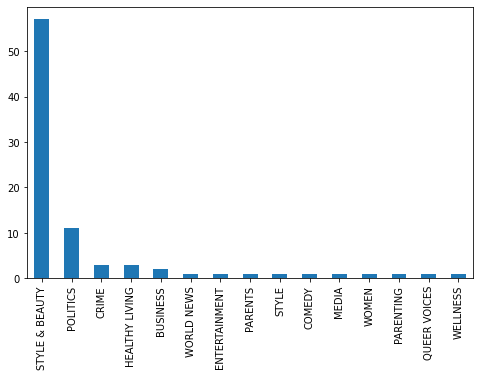

In [345]:
# making dataframe of distributions of the duplicated dataset
df['category'].value_counts().plot( kind='bar', figsize=(8,5))

From above we can see that style and beauty are the most duplicated category and rest are not even 10. By keeping these duplicated rows won't help much in our modelling, will only give bad results.

Anyways let's see if we have any empty strings in the duplicated dataset in the `category` column.

In [346]:
# let's see if any of the category cell is missing in the duplicated dataset
df[df.eq("")['category']]

,headline,category,short_description,authors,date


From above we can see that, we don't have any such rows.

__Let's peek into the `authors` column of this dataset.__

In [347]:
# having the counts of the categories in the duplicated dataset
df['authors'].value_counts()

                                                                                                 33
Ellie Krupnick                                                                                   11
Rebecca Adams                                                                                    7 
Sarah Leon                                                                                       5 
Menna van Praag, ContributorBestselling author of Men, Money & Chocolate.                        2 
Amanda Terkel                                                                                    2 
Jessica Misener                                                                                  2 
Marc Brownstein, ContributorBass player for The Disco Biscuits, founder and co-chair of He...    1 
Andrew Hart                                                                                      1 
Julee Wilson                                                                                     1 


There can be missing categories in this duplicated dataset as the top row from above shows a wierd empty space


Let's figure it out.

In [348]:
# let's see if any of the category cell is missing in the duplicated dataset
df[df.eq("")['authors']].head()

,headline,category,short_description,authors,date
72154,"Trump Campaign Manager Faces New Allegations Of Pushing, Sexually Suggestive Comments",POLITICS,"As Donald Trump faces questions about his campaign manager’s physical altercation with a protester over the weekend, BuzzFeed",,2016-03-21
104504,"Monica Lewinsky Is Back, But This Time It's On Her Terms",WOMEN,,,2015-03-20
109828,10 Most Hated Companies In America,BUSINESS,"To be truly hated, a company must alienate a large number of people.",,2015-01-17
112758,9 Terrifying American Murder Houses,CRIME,,,2014-12-14
132861,Tea Party PACs' Promise To Spend On Electing Candidates Falls Flat,POLITICS,,,2014-04-27


From above we can see that there are some rows in the duplicated dataset which have empty strings and along with it we have empty strings in the `short_description` column also.

Text(0, 0.5, 'counts')

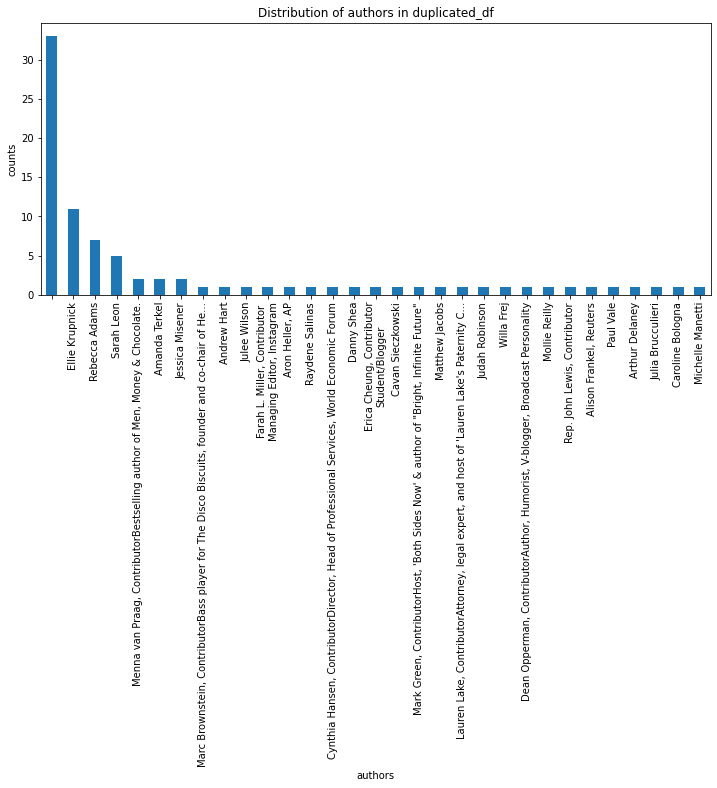

In [349]:
# making dataframe of distributions of the duplicated dataset
df['authors'].value_counts().plot( kind='bar', figsize=(12,5))
plt.title('Distribution of authors in duplicated_df')
plt.xlabel('authors')
plt.ylabel('counts')

Mostly the authors are missing in this duplicated dataset.

So, authors are mostly missing and "style & beauty" category is mostly duplicated.

Let's drop the duplicated rows now...

In [350]:
# dropping the duplicated rows
news_df.drop_duplicates(keep=False, inplace=True)

In [351]:
# sanity check
news_df.duplicated().sum()

0

---

### 1.2 Checking for missing data
<a class ='anchor' id = 'miss' ></a>

In [352]:
# both the below functions return the same answer
news_df.isnull().sum()

headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [353]:
#similar to the above function 
news_df.isna().sum()

headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

The fun part is although there is no null or Nan values in the dataset, but there can be empty strings present in the coulmns. Let's check for it and then deal with appropriately.


In [354]:
# checking for the empty string in news dataset
news_df.eq('').sum()

headline             6    
category             0    
short_description    19698
authors              37326
date                 0    
dtype: int64

Whoo hoo! it's a lot. But main focus project is to classify the news based on the headlines of the news. And maybe short_description column can be used to used to have a better analysis and better predictionns. So let's see what can be done with the empty strings of the short_description column.


---

##### Important Information::

First most of the time there's no "missing text", there's an empty string (0 sentences, 0 words) and this is a valid text value. The distinction is important, because the former usually means that the information was not captured whereas the latter means that the information was intentionally left blank. For example a user not entering a review is not missing information: the user chose not to enter any text and it cannot be assumed that this choice is equivalent to whatever text is the most common.

To the best of my knowledge there's no imputing in NLP. Imputing can make sense in some cases with a numerical value (even then it should be used cautiously), but in general text is too diverse (unstructured data) for the concept of "most frequent text" to make any sense. In general substituting real text (or absence of text) with artificially generated data is frowned upon from the point of view of evaluation.
##### SOURCE: [Stack exchange](https://datascience.stackexchange.com/questions/99545/how-to-impute-missing-text-data) 

Thus in my opinion the main design options are the following:


1. Leave the text empty. Most of the time an empty text can be represented like any other text value, e.g. as a TFIDF vector made of zeros.
2. Discard instances which have no text. For example in text classification no text means no input data at all, so there's no point performing the task for such cases.
3. Treating instances with no text as special cases based on the specifics of the task. For example such instances could be systematically assigned the majority class, if that makes sense for the task.
##### SOURCE: [Stack exchange](https://datascience.stackexchange.com/questions/99545/how-to-impute-missing-text-data) 

---

In [355]:
# Percentage of missing values in each column
news_df.eq('').sum()/news_df.shape[0]*100.0 

headline             0.002866 
category             0.000000 
short_description    9.410067 
authors              17.831261
date                 0.000000 
dtype: float64

From above we can see that __almost 18 percent of the names of the authors are missing__ from the column, which can be assumed that there could be news which in real had no authors while printing the news. However we have check this and deal with them appropriately. 

Also __9.4% of the data from the short_description column is missing__ and likewise we have to look into this. 

However, __only 6 headlines are missing__ from whole dataset, which we should definately remove it, but let's see them and then drop them.

In [356]:
# empty strings in the author column
news_df[news_df.eq("")['authors']].head()

,headline,category,short_description,authors,date
5,Cleaner Was Dead In Belk Bathroom For 4 Days Before Body Found: Police,U.S. NEWS,"The 63-year-old woman was seen working at the South Carolina store on Thursday. She was found dead Monday after her family reported her missing, authorities said.",,2022-09-22
20,Golden Globes Returning To NBC In January After Year Off-Air,ENTERTAINMENT,"For the past 18 months, Hollywood has effectively boycotted the Globes after reports that the HFPA’s 87 members of non-American journalists included no Black members.",,2022-09-20
21,Biden Says U.S. Forces Would Defend Taiwan If China Invaded,POLITICS,President issues vow as tensions with China rise.,,2022-09-19
31,Watchdog Report Finds Some Census Takers Who Fudged 2020 Data Didn’t Get Fired,U.S. NEWS,"Despite entering false information, their work wasn't redone fully and in some cases the census takers received bonuses, the Office of Inspector General reported.",,2022-09-18
38,German Customs Officials Follow Trail Of Slime And Find Bags Of Giant Snails,WEIRD NEWS,"“Never in the history of the Duesseldorf customs office has a trail of slime led us to smuggled goods,” spokesman Michael Walk told the media.",,2022-09-16


#### Converting the empty author column into unknown values

As the number of empty strings are a lot in the `authors` column in the dataset, so we cannot delete them, so we have to fill them with a unknown word.

In [357]:
# replace empty string with UNKNOWN word
news_df.authors.replace('',"unknown", inplace=True)

In [358]:
# sanity check
news_df[news_df.eq("")['authors']].head()

,headline,category,short_description,authors,date


As there are just 6 rows in the dataset of the `headline` column which have a empty string, and we can't replace them with any value as it is our main column, it's better to delete them, but let's have a look at them.

#### Deleting the 6 rows which have empty string in the headline column

In [359]:
news_df[news_df.eq("")['headline']]

,headline,category,short_description,authors,date
90944,,POLITICS,,"Robert Moran, ContributorRobert Moran leads Brunswick Insight, and writes and speaks on...",2015-08-22
95567,,RELIGION,"Let everyone not wrapped in tired and disproven doctrines about sex rid themselves of anti-scientific dogmas and be free. The law of grace, not of fear, can now blow freely.","Matthew Fox, ContributorRadical theologian Matthew Fox is the author of more than 30 b...",2015-06-30
103675,,WORLDPOST,,"Natasha Srdoc, ContributorAuthor, Economist, Co-Founder, Adriatic Institute and Internat...",2015-03-29
109100,,BUSINESS,,"Gary Snyder, ContributorWriter and Media Strategist",2015-01-25
110153,,MEDIA,,"Gary Snyder, ContributorWriter and Media Strategist",2015-01-13
122145,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strategist",2014-08-28


The 6 rows have empty strings in the `short_description` column too. So no need of keeping these 6 rows.

In [360]:
# deleting the rows
news_df = news_df[(~news_df.eq("")['headline'])]

In [361]:
# sanity check
news_df[news_df.eq("")['headline']]

,headline,category,short_description,authors,date


#### Lets do that short_description column too

`authors` column is done, `headline` column is done, now let's deal with the `short_description` column.

In [362]:
# defining a new df for empty short_description
empty_short = news_df[(news_df.eq("")['short_description'])]

In [363]:
empty_short['category'].value_counts()

POLITICS          3158
ENTERTAINMENT     2588
HEALTHY LIVING    1425
WORLDPOST         1336
BUSINESS          859 
COMEDY            756 
QUEER VOICES      743 
CRIME             726 
RELIGION          698 
STYLE             687 
SPORTS            663 
ARTS              646 
GREEN             576 
MEDIA             539 
TRAVEL            479 
WEIRD NEWS        461 
BLACK VOICES      406 
SCIENCE           403 
PARENTS           399 
IMPACT            398 
WOMEN             386 
GOOD NEWS         359 
FIFTY             359 
COLLEGE           223 
TASTE             156 
EDUCATION         112 
LATINO VOICES     108 
STYLE & BEAUTY    12  
CULTURE & ARTS    11  
FOOD & DRINK      9   
HOME & LIVING     3   
WORLD NEWS        2   
WELLNESS          2   
ENVIRONMENT       2   
TECH              1   
MONEY             1   
PARENTING         1   
Name: category, dtype: int64

We already know that 9% of the `short_decription` column is empty, we cannot delete such amount of data from the table. Let's see in which way we can impute these columns.

Text(0, 0.5, 'counts')

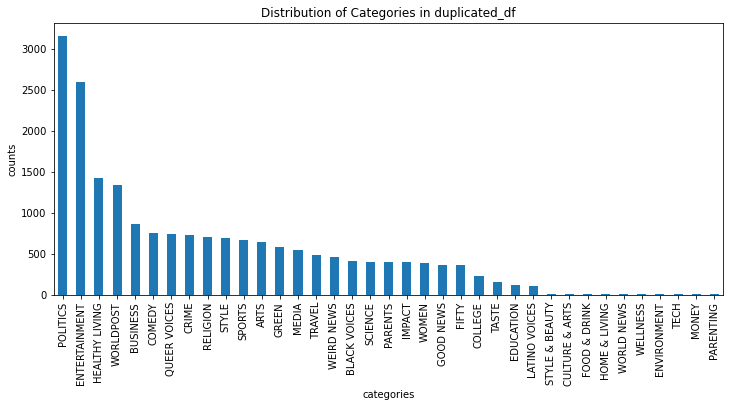

In [364]:
# making dataframe of distributions of the duplicated dataset
empty_short['category'].value_counts().plot( kind='bar', figsize=(12,5))
plt.title('Distribution of Categories in duplicated_df')
plt.xlabel('categories')
plt.ylabel('counts')

__POLITICS, ENTERTAINMENT, HEALTHY LIVING__, are the top categories which have empty strings in the dataset.

Lets copy the `headline` text into the `short_description` as same.... However, it should be considered if we included this column into the model.

In [365]:
# copying headline to short_description
news_df.loc[(news_df.eq("")['short_description']), 'short_description'] = news_df.loc[(news_df.eq("")['short_description']), 'headline']

In [366]:
# sanity check
news_df[(news_df.eq("")['short_description'])]

,headline,category,short_description,authors,date


---

##### Setting column width

As column headline and short_description are not fully visisble in terms of the information they have let's change the column width.

In [367]:
pd.set_option('display.max_colwidth', -1)

C:\Users\user\AppData\Local\Temp\ipykernel_18656\3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [368]:
#sanity check
news_df.head()

,headline,category,short_description,authors,date
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,U.S. NEWS,Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.,"Carla K. Johnson, AP",2022-09-23
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",U.S. NEWS,"He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",Mary Papenfuss,2022-09-23
2,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),COMEDY,"""Until you have a dog you don't understand what could be eaten.""",Elyse Wanshel,2022-09-23
3,The Funniest Tweets From Parents This Week (Sept. 17-23),PARENTING,"""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce.""",Caroline Bologna,2022-09-23
4,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,U.S. NEWS,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.,Nina Golgowski,2022-09-22


From above it's good now we can see that headline and short description are fully visible.

Link column looks weird as we cannot click on the links and we have copy paste them in order to see what is depicted by it. Anyways for this project, I don't need link column for my analysis. So, let's drop it. 

Now let's see the number categories of the news we have in the dataset. Also, this is our dependent variable.

---

#### 1.3 EDA `category` column 
<a class ='anchor' id = 'EDAcategory' ></a>

Let's see what are the different types of categories we have in the dataset.


In [369]:
# calculating frequency of different types of categories in the dataset
news_df['category'].value_counts()

POLITICS          35577
WELLNESS          17937
ENTERTAINMENT     17360
TRAVEL            9900 
STYLE & BEAUTY    9694 
PARENTING         8789 
HEALTHY LIVING    6688 
QUEER VOICES      6344 
FOOD & DRINK      6340 
BUSINESS          5987 
COMEDY            5398 
SPORTS            5077 
BLACK VOICES      4583 
HOME & LIVING     4320 
PARENTS           3953 
THE WORLDPOST     3664 
WEDDINGS          3653 
WOMEN             3568 
CRIME             3556 
IMPACT            3484 
DIVORCE           3426 
WORLD NEWS        3297 
MEDIA             2941 
WEIRD NEWS        2777 
GREEN             2622 
WORLDPOST         2578 
RELIGION          2576 
STYLE             2252 
SCIENCE           2206 
TECH              2096 
TASTE             2096 
MONEY             1756 
ARTS              1509 
ENVIRONMENT       1442 
FIFTY             1401 
GOOD NEWS         1398 
U.S. NEWS         1377 
ARTS & CULTURE    1339 
COLLEGE           1144 
LATINO VOICES     1130 
CULTURE & ARTS    1074 
EDUCATION       

Whoo hu! Seems a lot. Let's plot the above answer and see how many total do we have.

In [370]:
##Checking total categories
len(pd.unique(news_df['category']))

42

<AxesSubplot:>

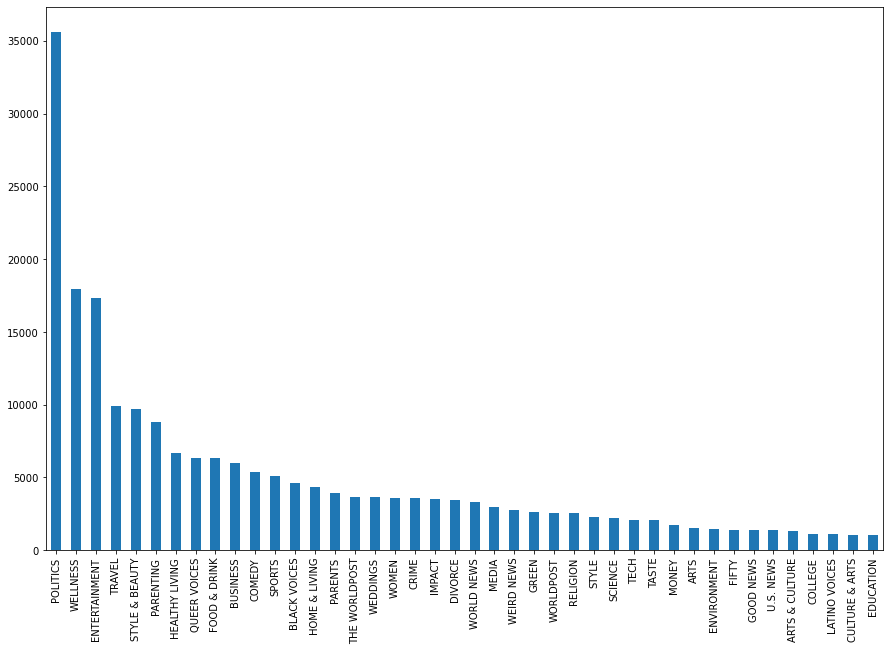

In [371]:
# distribution of 42 categories on bar chart
news_df['category'].value_counts().plot( kind='bar', figsize=(15,10))

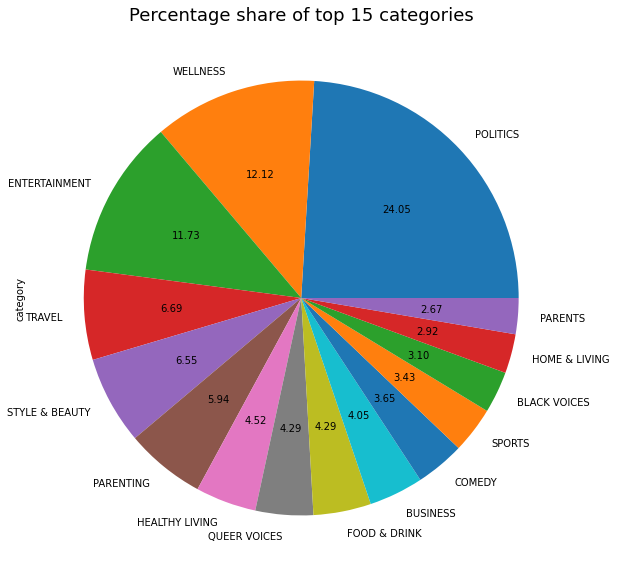

In [372]:
# pie chart for frequency of top 15 categories
plt.figure(figsize=(10,10))
news_df['category'].value_counts().sort_values(ascending=False)[:15].plot(kind='pie', autopct='%.2f')
plt.title('Percentage share of top 15 categories', fontsize=18)
plt.show()

The pie chart shows the percentage share of top 15 categories in the dataset. With 24% POLITICS has the highest share followed by WELLNESS with 12% share.

From above we can see that we have 42 categories of news in the dataset. For the classification analysis of these categories it is gonna be a lot more difficult and a bit complex to predict a new news category.

So at first We'll try to combine any of the possible similar kind of news and reduce the number of news categories on the constructive basis after doing some analysis on each of them. 

As seen from above, there are categories like, __FIFTY, GOOD NEWS, WORLDPOST, THE WORLDPOST, QUEER VOICES, IMPACT, GREEN/ENVIRONMENT, TASTE,__ etcetera.

Let's explore one by one and merge or delete accordingly to shorten the length of categories we have.

Let's begin.

#### 1.3.1 'WORLDPOST' category

In [373]:
# peeking into category
worldpost_df = news_df.loc[news_df['category'] == 'WORLDPOST']
worldpost_df.sample(6)

,headline,category,short_description,authors,date
108626,Weekend Roundup: Greece Revolts!,WORLDPOST,"No sooner did the global elites leave their annual talking shop high in the Alps at Davos last week than the people spoke in Greece. In a mutiny against an untenable status quo, those who are run over have revolted against those who run things. Now righteous populism must face economic, financial and political realities if other European states don't bend Greece's way.\n\nTo keep up with the drama as it evolves over the coming weeks, we've connected WorldPost readers directly to the daily blog of Yanis Varoufakis, the self-described ""erratic Marxist"" who is now Greece's finance minister. Writing from Athens, HuffPost Greece Editorial Director Sophia Papaioannou says Alexis Tsipras' electoral victory will give suffering Greeks ""space and time"" to address their predicament. Former Greek Prime Minister George Papandreou argues that the path forward after the election is for a national referendum on a ""Greek plan"" for reform that will bind a now polarized nation. Rena Dourou, a deputy of the victorious Syriza party, notes that the vote was as much against the corruption of the formerly ruling political parties in Greece as it was against austerity. (continued)","Nathan Gardels, ContributorEditor-in-chief, The WorldPost",2015-01-31
110132,A New Age for Sri Lanka?,WORLDPOST,"It's difficult to describe just how shocking it is that Maithripala Sirisena, not Mahinda Rajapaksa, is the seventh president of Sri Lanka.","Akshan deAlwis, ContributorStudent leader",2015-01-14
102297,Never To Be Forgotten - A Year On From Chibok,WORLDPOST,"On April 14th 2014, a ruthless militia kidnapped over 200 of Nigeria's young girls from their school in Chibok in the dead of night. A year on, the girls have yet to be released by Boko Haram, nor rescued by our security forces, leaving their families waiting and praying for answers.","Toyin Ojora-Saraki, ContributorFounder-President, The Wellbeing Foundation Africa",2015-04-14
107989,Anguish in Argentina After Prosecutor's Mysterious Death,WORLDPOST,Anguish in Argentina After Prosecutor's Mysterious Death,Matt Sheehan,2015-02-07
125910,Western Leaders Who Demand Israeli Restraint,WORLDPOST,"It is absolutely in the interest of Israel to destroy Hamas' capacity to make war and murder non-combatants, a position that the Obama Administration should be supporting Israel in accomplishing just at the United States is continuing to do against Al Qaida.","Rabbi Shmuley Boteach, ContributorRabbi Shmuley, ""America's Rabbi,"" is the international best-se...",2014-07-17
102586,Modi's Oxymoronic Stance on Climate Change,WORLDPOST,"Yes, the world doesn't need to tell India what to do because of our unique cultural value to the environment and our minimal contribution to historic carbon emissions, but neither can India's Prime minister continue to dwell in rhetoric and falsely lead the public into thinking he is doing enough to protect them.","Chaitanya Kumar, ContributorSouth Asia campaigns coordinator, 350.org",2015-04-11


##### Interpretations  from the above table

1. WORLDPOST news is basically the news from around the world (different countries can be seen in the headline coulmn.)
2. If a country is not mentioned in the headline column it is mentioned in the short_description column.

#### 1.3.2 'THE WORLDPOST' category

In [374]:
# peeking into the category
theworldpost_df = news_df.loc[news_df['category'] == 'THE WORLDPOST']
theworldpost_df.sample(6)

,headline,category,short_description,authors,date
62050,HuffPost Rise: Here's What You Need To Know On July 15th,THE WORLDPOST,At least 84 people were killed in a horrific attack in Nice.,unknown,2016-07-15
39138,Rex Tillerson Says U.S. Committed To NATO In First Alliance Meeting,THE WORLDPOST,He also pressed allies to meet a defense spending goal of 2 percent of gross domestic product,unknown,2017-03-31
72437,DNA Of Hunted Paris Attacker Found In Raided Brussels Apartment,THE WORLDPOST,"BRUSSELS, March 18 (Reuters) - The most-wanted fugitive from November's Paris attacks was wounded in a shootout in Brussels",unknown,2016-03-18
39426,Criminalizing The Muslim Brotherhood Helps Dictators And Hurts Americans,THE WORLDPOST,Our government has a responsibility to protect its citizens from politically motivated violence.,"Engy Abdelkader, ContributorAttorney. Scholar. Researcher. Educator.",2017-03-29
61798,New Security Measures At Brazil's Airports Cause Havoc Ahead Of Olympics,THE WORLDPOST,Authorities have insisted the new screenings are not related to attacks abroad.,"Alonso Soto, Reuters",2016-07-18
82151,Suspected Jihadists Kill 3 At U.N. Base In North Mali,THE WORLDPOST,"BAMAKO, Nov 28 (Reuters) - The United Nations said unknown attackers fired rockets at a U.N. peacekeeping base in Kidal in","Tiemoko Diallo, Reuters",2015-11-28


#### Interpretations from the above table

1. Basically the 'world post' and 'the world post' have the same features, so it would be good if we rename one of these to the other category.

Let's see the world news and see the difference between the worldpost, worldpost and world news.

#### 1.3.3 'WORLD NEWS' category

In [375]:
# peeking into the category
worldnews_df = news_df.loc[news_df['category'] == 'WORLD NEWS']
worldnews_df.sample(6)

,headline,category,short_description,authors,date
5394,"China Reports Over 1,280 Coronavirus Cases, Death Toll At 41",WORLD NEWS,The virus that originated in Wuhan is dimming Lunar New Years celebrations across China.,"Ken Moritsugu, AP",2020-01-25
31605,'We Thought Gender Was Only For Educated People',WORLD NEWS,"Cross-posted from UN Women “I have been a farmer for as long as I can remember. Now, a widow with two married daughters, farming","UN Women, ContributorUN Women is the UN organization dedicated to gender equality a...",2017-06-27
29282,"News Roundup for July 25, 2017",WORLD NEWS,"Here’s your news. Don’t stop the beat. 1. Are the Russians supplying the Taliban with arms? Looks likely, but we still need","Outspeak, ContributorOutspeak™ is the opinion outlet for digital storytellers every...",2017-07-25
8107,China Treats Uighur Kids As ‘Orphans’ After Parents Seized,WORLD NEWS,“It’s like my kids are in jail. My four children are separated from me and living like orphans.”,"Yanan Wang and Dake Kang, Associated Press",2018-09-22
16193,Pope Pleads For Forgiveness In Chile For Clergy Sex Abuse Scandal,WORLD NEWS,Francis' trip to Chile has already been marred by protests against how the church has handled child abuse allegations.,"Philip Pullella, Dave Sherwood, Reuters",2018-01-16
33428,Bridges And Roads In North-east India May Drive Small Tribes Away From Development,WORLD NEWS,"The Idus, along with the Miju and the Digaru communities, comprise the larger Mishmi tribe. They have a symbiotic relationship","The Conversation Global, ContributorThe Conversation is a collaboration between editors and academ...",2017-06-06


#### Interpretations from the above table

1. It contains the general information about different countries
2. Basically 'the worldpost', 'worldpost' and 'worldnews' can be combined together.

In [376]:
# replacing categories into one
news_df.category.replace({'THE WORLDPOST':'WORLD NEWS', 'WORLDPOST':'WORLD NEWS'}, inplace = True)

#### 1.3.4 'GREEN' category

In [377]:
# peeking into the category
green_df = news_df.loc[news_df['category'] == 'GREEN']
green_df.sample(6)

,headline,category,short_description,authors,date
107584,It's (Way Past) Time to End Greyhound Racing in America,GREEN,"It's always appalling to see animals abused and betrayed for profit, especially when the activity is legal and defended as a ""sport."" That's the reality of greyhound racing, but the reasons this detestable industry still exists defy not just our humane values, but common sense as well.","Matthew Bershadker, ContributorASPCA President and CEO",2015-02-12
128040,"For the Ocean's Sake, Tame the High Seas 'Wild West'",GREEN,"Over the years, I have witnessed the steady decline of the dolphins that used to chase our boat, the fish that I could land, and the plentiful shellfish I took for granted. The oceans of my childhood have been overfished, polluted, and strewn with plastic waste.","Sigourney Weaver, ContributorAcademy Award nominated actress",2014-06-23
106382,A True Phenomenon Unfolding at Bellahummingbird.com: Bella's Tiny Family Rewriting the Rules of Nature,GREEN,A True Phenomenon Unfolding at Bellahummingbird.com: Bella's Tiny Family Rewriting the Rules of Nature,"Wendy N. Powell, ContributorAuthor; Management and career expert",2015-02-26
99731,Freeman Dyson Offers Up a Smorgasbord of Climate Change Misconceptions,GREEN,"Not that it will do any good, but I implore Professor Dyson to take a good hard look at the scientific evidence and think again -- especially because his deserved scientific eminence may lead the public to overindulge at his smorgasbord of misconceptions.","Ann Reid, ContributorExecutive Director, National Center for Science Education",2015-05-14
63787,140-Year-Old Zoo Is Closing And Sending Animals To Sanctuaries,GREEN,The Buenos Aires zoo has come under fire for its treatment of animals.,Hilary Hanson,2016-06-25
67163,13-Year-Old Boy Rescues Dog Trying To Flee Hot Car,GREEN,"Bradley North was leaving school with his friends when he noticed something concerning — a dog left alone in a hot car, with",unknown,2016-05-18


#### 1.3.5 'ENVIRONMENT' category

In [378]:
# peeking into the category
environment_df = news_df.loc[news_df['category'] == 'ENVIRONMENT']
environment_df.sample(6)

,headline,category,short_description,authors,date
163678,"Animal Photos Of The Week: Pregnant Panda, Capuchin Monkey And More Pictures",ENVIRONMENT,Some of the most popular animal stories from the last week include: Wildlife experts concluded that aggressive behavior was,unknown,2013-06-02
141993,Will Europe Scrap Its Renewables Target? That Would Be Good News for the Economy and for the Environment,ENVIRONMENT,"Without the renewables mandate, the cap being planned for the EU ETS will be achieved at lower cost and will foster greater incentives for climate-friendly technological change.","Robert Stavins, Contributor\nDirector of the Harvard Environmental Economics Program",2014-01-18
204251,Hatch Watch 2012: Decorah Eagles' Eggs Ready To Hatch,ENVIRONMENT,"Live streaming by Ustream For those who might accidentally miss the first hatch, worry not. Each of the remaining eggs will",Tara Kelly,2012-03-25
201676,It's Climate Change That Threatens Our Way of Life -- Not the Actions We Need to Take to Solve It,ENVIRONMENT,"What would I actually say to convince them to start fighting for our children's future, rather than the profits of the fossil fuel companies? What would it take to penetrate that armor of business and politics as usual, and wake them up?","Kelly Rigg, Contributor\nCampaign consultant",2012-04-22
189275,Money Saving Tips: Green Ways To Cut House Costs,ENVIRONMENT,From DealNews' Lou Carlozo: Quick: Imagine someone's hacked your bank account to steal your hard-earned cash bit by bit. They've,unknown,2012-09-03
197762,Rio Dialogues Part II: Gaining Perspective,ENVIRONMENT,"Now in full swing, the Rio Dialogues continue to provide an opportunity for the civil, scientific, public and private communities to take their ideas center stage.","Elischia Fludd, Contributor\nActivist/Organizer, Social Entrepreneur, Journalist",2012-06-03


I can combine the environment and green category, pretty much everything is same.

In [379]:
# replacing categories into one
news_df.category.replace({'GREEN':'ENVIRONMENT'}, inplace = True)

#### 1.3.6 Healthy living and wellness

In [380]:
# peeking into the category
healthy_df = news_df.loc[news_df['category'] == 'HEALTHY LIVING']
healthy_df.sample(6)

,headline,category,short_description,authors,date
21214,A Controversial Experiment Upends The Conventional Wisdom On Heart Stents,HEALTHY LIVING,"In addition to its finding on stents, the test showed the importance of the placebo effect.",Anna Almendrala,2017-11-04
62309,General Mills Recalls Betty Crocker Cake Mixes Over E. Coli Fears,HEALTHY LIVING,No illnesses reported to date from the products.,unknown,2016-07-12
19979,Time To Save The World,HEALTHY LIVING,"More than 15,000 scientists from nearly 200 countries have signed their support for a scientific publication reminding humanity","David L. Katz, M.D., M.P.H., ContributorFounder, True Health Initiative",2017-11-21
97057,Playing Catch Is Good for You,HEALTHY LIVING,Playing Catch Is Good for You,"Richard C. Senelick, M.D., ContributorNeurologist, author, blogger and international speaker",2015-06-13
37327,Uninsured Americans Are Just 1 Traumatic Injury Away From Financial Ruin,HEALTHY LIVING,One unforeseen major injury could potentially cost well over half of someone’s annual income.,"Ronnie Cohen, Reuters",2017-04-21
106559,Silence Your Thoughts With This Simple Technique,HEALTHY LIVING,"I recently returned from my European tour through Amsterdam and Stockholm, and I wanted to share a few timeless secrets of meditation with you.","davidji, Contributorglobally recognized mindbody health & wellness expert, mindful...",2015-02-24


In [381]:
# peeking into the category
wellness_df = news_df.loc[news_df['category'] == 'WELLNESS']
wellness_df.sample(6)

,headline,category,short_description,authors,date
153717,Creutzfeldt-Jakob Disease: A Look At The Risk Of Contracting The Prion Infection During Surgery,WELLNESS,New Hampshire health officials announced last week that hospitals in three New England states may have accidentally exposed,Amanda L. Chan,2013-09-16
204669,Sleep Better To Get Your Energy Back,WELLNESS,"By Mary Kate Frank ""The main reason I see for loss of energy in women is that they have too much to do,"" says Michael Roizen",unknown,2012-03-20
135767,Viktor Frankl on the Human Search for Meaning,WELLNESS,"Celebrated Austrian psychiatrist and Holocaust survivor Viktor Frankl, born on March 26, 1905, remains best-known for his",unknown,2014-03-26
156362,Adherence To Dietary Guidelines For Americans Could Keep Pancreatic Cancer Risk Low,WELLNESS,"""As shown with the findings from [Hannah] Arem et al., food based indices such as the HEI may provide a superior and more",unknown,2013-08-19
140790,"Mindful At Work Challenge, Day 4: Learning To Eat Mindfully",WELLNESS,Now turn your attention to the mind. Can you notice thoughts or emotions that might be present? Are there full-length feature,unknown,2014-01-30
156465,High Fiber Breakfast (That Isn't Cereal!),WELLNESS,"Instead, we'd like to recommend a handful of easy, delicious, fill-you-up breakfasts that don't give you a day's worth of",unknown,2013-08-17


In [382]:
# replacing categories into one
news_df.category.replace({'WELLNESS':'HEALTHY LIVING'}, inplace = True)

#### 1.3.7 style and beauty and style

In [383]:
# peeking into the category 
stylebeauty_df = news_df.loc[news_df['category'] == 'STYLE & BEAUTY']
stylebeauty_df.sample(6)

,headline,category,short_description,authors,date
208664,Q10 With Dr. Oz,STYLE & BEAUTY,"1. Whom do you credit for inspiring you to be the person you are today? Like most people, it's a composite of several influential characters in my life - my wife, my father and my father in law have had the largest and most immediate impact on my growth as an adult. Professionally, Ms. Winfrey both taught me the process of television as well as launched me into the broadcasting world.","Kara Ross, Contributor\nAward-winning jewelry designer; GIA-certified gemologist",2012-02-06
191584,"Ashley Johnson, Actress, Evolved From 'Growing Pains' Tot To 'The Killing' Star In Style (PHOTOS)",STYLE & BEAUTY,"Actress Ashley Johnson, who is best known for playing Chrissy Seaver in ""Growing Pains,"" has spent her whole life in the",Sarah Leon,2012-08-08
151321,You Won't Believe How Much These Fashion Editors Spend On Their Outfits (VIDEO),STYLE & BEAUTY,"To be a fashion editor, one must have excellent taste -- but does that mean expensive taste? For Anna Dello Russo and Giovanna",unknown,2013-10-11
193565,Madonna Thong Incident Leaves Us Wondering: Are Her Tour Clothes Working For Her? (NSFW PHOTOS),STYLE & BEAUTY,"But what most caught our eye last night was Madonna's thong. Yes, thong. The underwear emerged as part of her tour choreography",unknown,2012-07-18
175477,"J. Shelby Bryan, Anna Wintour's Boyfriend, Owes IRS $1.2 Million",STYLE & BEAUTY,Yikes. That's not the sort of glamorous state of affairs we associate with Anna Wintour. Read more at Telegraph.co.uk The,Ellie Krupnick,2013-01-29
148337,Over-the-Knee and Over Forty? Hell Yes,STYLE & BEAUTY,"Despite my inner critic, I instantly fell in love with black and white snakeskin Silve heel by Jeffrey Campbell and the patent leather, thigh-high Jeffrey Campbell Acie.","Christine Bronstein, Contributor\nFounder of Nothing But The Truth Publishing",2013-11-11


In [384]:
# peeking into the category
style_df = news_df.loc[news_df['category'] == 'STYLE']
style_df.sample(6)

,headline,category,short_description,authors,date
20977,Tiffany's Is Trolling Everyone With 'Everyday Objects' That Cost A Fortune,STYLE,"""That paperclip better be able to keep my life together.""",Jamie Feldman,2017-11-08
110321,Now THIS Is How You Bring In The New Year,STYLE,Now THIS Is How You Bring In The New Year,Dana Oliver,2015-01-11
118159,FAShion Arts Society in Chicago: The Best Part of the Day,STYLE,"It was the end of a long, fantastic day #1 for our group, the FAShion Arts Society of the Indianapolis Museum of Art. We were overnighting in Chicago, a first for our still-new affiliate group, in one of its grand downtown hotels.","Kimann Schultz, Contributorarts advocate, author illustrator, podcaster",2014-10-13
132484,Our Mother's Day 2014 Beauty Gift Guide For Every Budget,STYLE,Our Mother's Day 2014 Beauty Gift Guide For Every Budget,Dana Oliver,2014-05-02
131912,The 12 Baby Products That Save Our Adult Lives,STYLE,The 12 Baby Products That Save Our Adult Lives,Chanel Parks,2014-05-09
91615,This 5-Year-Old Can Teach You A Thing Or Two About Getting Dressed,STYLE,*Reconsiders life choices*,Michelle Persad,2015-08-14


Almost same, combine the above 2 categories.

In [385]:
# replacing categories into one
news_df.category.replace({'STYLE':'STYLE & BEAUTY'}, inplace = True)

#### 1.3.8 culture and arts and arts

In [386]:
# peeking into the category
arts_df = news_df.loc[news_df['category'] == 'ARTS']
arts_df.sample(6)

,headline,category,short_description,authors,date
96545,World's Best (Literary) Dads,ARTS,"Happy Father's Day! While we take a break from toasting our own dads, we thought we'd make a list of our favorite fictional fathers.","Grammarly, ContributorAutomated Proofreader",2015-06-19
115611,A Purveyor of Truth: The Writer's Life (Part 2),ARTS,A Purveyor of Truth: The Writer's Life (Part 2),"Max Dorfman, ContributorJournalist, Author, Psychology Enthusiast",2014-11-12
117042,Astana Opera on New York's Cultural Radar Screen,ARTS,"New Yorkers are in the enviable position that, sooner or later, everyone will come and visit the city. We do not have to travel the world - even though many of us love to do so - to learn about different cultures because the world comes to us.","Shai Baitel, ContributorExpert in Middle Eastern Politics and International Affairs",2014-10-26
130153,"First Nighter: Pushkin's Eugene Onegin, Poe's The Raven Take Flight",ARTS,"Guess it's blowin' in the zeitgeist, but two adaptations involving rhymed classics are available in Manhattan this weekend only and worth any theatergoer's precious time.","David Finkle, ContributorWriter, Drama Critic",2014-05-30
132099,25 Street Artists From Around The World Who Are Shaking Up Public Art,ARTS,25 Street Artists From Around The World Who Are Shaking Up Public Art,Katherine Brooks,2014-05-07
118009,"Caves, Icebergs, and Humanoid Landscapes: A Collaboration With Rebecca Chaperon",ARTS,"In my writing practice, I often write poems that have been sparked by an image. Last summer, I came across Rebecca Chaperon's work, and was stunned by its weird beauty.","Hannah Stephenson, ContributorPoet, Editor, Instructor",2014-10-15


In [387]:
# peeking into the category
artsandculture_df = news_df.loc[news_df['category'] == 'ARTS & CULTURE']
artsandculture_df.sample(6)

,headline,category,short_description,authors,date
93866,Become Who You Are: The World's First Legally Recognized Cyborg May Be Onto Something,ARTS & CULTURE,Would you ever consider becoming a cyborg?,Priscilla Frank,2015-07-20
71499,"Would You Buy a 1,433-Pound Meteorite For $1.1 Million?",ARTS & CULTURE,The extraterrestrial gemstones are an added bonus.,Priscilla Frank,2016-03-29
16602,Man Surprises Girlfriend By Drawing Them In Different Animation Styles,ARTS & CULTURE,What a colorful Christmas gift.,Elyse Wanshel,2018-01-10
25809,"Tina Fey's 'Mean Girls' Musical Has Its Plastics, And An Official Release Date",ARTS & CULTURE,So fetch.,Cavan Sieczkowski,2017-09-06
47234,Critics Threaten Boycotts Of Simon & Schuster Over Milo Yiannopoulos Book Deal,ARTS & CULTURE,"""In response to this disgusting validation of hate, we will not cover a single [Simon & Schuster] book in 2017.""",Claire Fallon,2016-12-30
31364,24 Times J.K. Rowling Wrote Or Said Something That Hit All The Feels,ARTS & CULTURE,WARNING: This will make you want to curl up with all her books and disappear.,Jenna Amatulli,2017-06-29


Combine the above two.

In [388]:
# replacing categories into one
news_df.category.replace({'ARTS':'ARTS & CULTURE', 'CULTURE & ARTS':'ARTS & CULTURE'}, inplace = True)

#### 1.3.9 Education and college

In [389]:
# peeking into the category
education_df = news_df.loc[news_df['category'] == 'EDUCATION']
education_df.sample(6)

,headline,category,short_description,authors,date
17607,Newly Reelected New York City Mayor Decides His School Renewal Plan Failed But Still Claims Success,EDUCATION,"The DOE, Farina and de Blasio also fail to explain a number of things about the new program.","Alan Singer, ContributorSocial studies educator, Hofstra University, my opinions, of c...",2017-12-22
120531,Don't Bother With Yale: Even the Most Excellent Sheep are Still Part of a Herd,EDUCATION,"Kids lose their childhoods to appease the college admissions Gods (and their parents), endure record rates of depression and anxiety, and arrive on campus stripped of curiosity or self-knowledge. They excel at following orders, hence they are ""excellent sheep.""","Linda Flanagan, ContributorFreelance writer",2014-09-16
26213,Opposition Rallies Against Plan To Put Unqualified People In Classrooms,EDUCATION,Politically influential charter school operators in the State of New York are on the verge of pushing through an administrative,"Alan Singer, ContributorSocial studies educator, Hofstra University, my opinions, of c...",2017-08-31
40792,What Are Teachers Looking For When They Want To Leave Teaching?,EDUCATION,Something has to change before it’s too late. Aren’t our children worth it?,"Jennifer Wolfe, ContributorJennifer Wolfe - a writer-teacher-mom",2017-03-12
39230,The Real Reason Students Shouldn't Sit In Class,EDUCATION,A recent article in the New York Times discussed why children should be given opportunities for movement during class. I,"Laura Flores Shaw, Contributorwriter, speaker, gadfly",2017-03-31
125558,Mr. Minkel Goes to the White House,EDUCATION,"There should have been a conversation about what it means to educate all parts of a child, from the head to the heart, to the physical body. What can we do to start helping all children to develop ALL parts of themselves?","Megan Rosker, ContributorMother and writer",2014-07-21


In [390]:
# peeking into the category
college_df = news_df.loc[news_df['category'] == 'COLLEGE']
college_df.sample(6)

,headline,category,short_description,authors,date
99979,Choosing Joy in a Selfish Place,COLLEGE,"Embracing these last couple of weeks is difficult to do if we are constantly criticizing, quantifying the validity of our experiences by counting the number of ""likes"" on our Instragram photos, rather than internalizing our own happiness.","Anneli Lucia Tostar, ContributorStudent, Harvard University",2015-05-11
104824,Comparing Federal Student Loans to Other Household Debt is Popular -- It's Also Wrong,COLLEGE,"Is it really appropriate to compare student loans with mortgages, auto loans and credit card debt? If I put on my consumer hat, it feels like we should. If I put on my economics hat though, student loans seem absurdly incomparable to practically every other form of household debt.","Carlo Salerno, ContributorHigher education economist",2015-03-16
78073,Ithaca College President Announces Retirement After Campus Protests,COLLEGE,Students demanded Tom Rochon's retirement for his handling of racial tensions on campus.,Mollie Reilly,2016-01-14
128661,Here's How Much It'd Cost To Launch A Radical New Tuition Model,COLLEGE,Here's How Much It'd Cost To Launch A Radical New Tuition Model,Tyler Kingkade,2014-06-16
112885,College Rejection Doesn't Have to Mean Frustration,COLLEGE,"Students can do a great deal, both before and after applying, to ensure that they maintain their sanity, embrace colleges' decisions, and actually increase their chances of getting into their favored schools.","Josh Stephens, ContributorCollege counselor and specialist in college application essays.",2014-12-13
100141,"Colleges Suspend Students For Sexual Assault, But Don't Actually Ban Them From Campus",COLLEGE,"Colleges Suspend Students For Sexual Assault, But Don't Actually Ban Them From Campus",Tyler Kingkade,2015-05-09


In [391]:
# replacing categories into one
news_df.category.replace({'COLLEGE':'EDUCATION'}, inplace = True)

#### 1.3.10 Parents and parenting

In [392]:
# peeking into the category
news_df.loc[news_df['category'] == 'PARENTS'].sample(6)

,headline,category,short_description,authors,date
113528,The Reality Of Family Time,PARENTS,"All I want is peace and for the game to end before I'm old enough to sprout hairs out of the moles on my face. As I pack up the evil pieces, eye still twitching, I somehow keep it together and say, ""That was fun,"" and wonder if anyone believes me.","M. Blazoned, ContributorWriter. Blogger. Recovering Nail Biter. Wearer of Funny Hats. ...",2014-12-05
58597,Mesmerizing Time-Lapse Video Shows Dad Making Amazing Disney Bedroom,PARENTS,"He turned it into ""A Whole New World.""",Taylor Pittman,2016-08-23
106613,"Working Moms, You Belong Here",PARENTS,"Kellee Mayfield keeps hearts beating, literally, as a sales and clinical specialist for pacemakers and defibrillators. She's also a talented painter, and writes about life in southeast Arkansas on her popular blog Delta Moxie.","Lela Davidson, ContributorAuthor of Faking Balance, Blacklisted from the PTA, and Who Pe...",2015-02-23
21472,Awesome Nurse Knits Tiny Halloween Costumes For Babies In The NICU,PARENTS,Tara Frankhauser created more than 30 adorable costumes.,Caroline Bologna,2017-11-01
25485,Why I’ll Never Complain About Turning Another Year Older,PARENTS,"I want as much time as possible with the ones I love, which inevitably means growing older.","Jacque Gorelick, ContributorMother. Wife. Teacher. Enthusiast of Caffeine, Music and Words...",2017-09-11
118664,8 Ways to Help Your Kids Stress 'Better',PARENTS,"Yes, there is something known as ""good"" stress. And research shows that making people aware of good stress is a more powerful antidote to its ills than jarring them with statistics.","Renee Jain, ContributorChief Storyteller at GoZen.com, Anxiety Relief Programs for Kids",2014-10-07


In [393]:
# peeking into the category
news_df.loc[news_df['category'] == 'PARENTING'].sample(6)

,headline,category,short_description,authors,date
169841,"Andy, Toddler, Stars In The 'Greatest Family Photo Of All Time' (PHOTOS)",PARENTING,"Sounds like an exaggeration, right? But really, in a funny way, it was pretty accurate. Last month, we asked readers to send",unknown,2013-03-29
165218,You Can't Say That to a Pregnant Woman,PARENTING,Today's post is about what not to say to a pregnant woman. The first three are from personal experience. The next two are questions that you need to just trust me on -- don't ask.,"Judith Natelli McLaughlin, Contributor\nAuthor, poet, lover of words",2013-05-16
167803,Day of Dissonance,PARENTING,"There are many challenges that come with parenting, but today I have been most challenged by my overwhelming urge to weep and the need to maintain a sense of calm and stability for Laurel and Violet. It has been a day of dissonance on so many levels.","Christine Koh, Contributor\nMusic and brain scientist turned writer, editor, designer, con...",2013-04-19
164603,Mamarazzi® With Pitbull,PARENTING,"Pitbull credits him mom with a lot, telling us, ""My mother always told me the pen is mightier than the sword.""","Denise Albert and Melissa Gerstein, Contributors",2013-05-23
181264,Mother Raised Daughter As Boy For 2 Years In Secret [VIDEO],PARENTING,"For two years the mother dressed her daughter in boy's clothes and cut her hair short, convincing family members, including",Ron Dicker,2012-11-28
166544,"Seriously, Do You Know This Child?",PARENTING,"Now, I don't yet consider myself an overprotective parent, but I plan to become one. I am already terrified about all that my daughters will encounter in the world as they grow. In fact, I think about it constantly. And they are only three and five.","Karri-Leigh P. Mastrangelo, Contributor\nReality Television Producer, Writer & Mommy Extraordinaire",2013-05-02


In [394]:
# replacing categories into one
news_df.category.replace({'PARENTS':'PARENTING'}, inplace = True)

#### 1.3.11 Weddings and divorce

In [395]:
# peeking into the category
news_df.loc[news_df['category'] == 'WEDDINGS'].sample(6)

,headline,category,short_description,authors,date
154798,Cute Engagement Photo Features Bride-To-Be Floating Away On A Balloon,WEDDINGS,"One Texas woman discovered that it's all too easy to get carried away by love. On Saturday, bride-to-be Kendall Sawyer and",unknown,2013-09-04
150353,"Side by Side, Battling Cancer and Sending Off the Bride",WEDDINGS,"When I caught up with Nancy Borowick on Thursday morning, she was running around East Harlem shooting a neighborhood feature",unknown,2013-10-21
193978,5 Things To Do Before Or After You Get Married...,WEDDINGS,Read these tips and take notes -- or else suffer the consequences of doing too many things at once.,"Deborah DeFrancesco, Contributor\nFounder, Bitchless Bride",2012-07-13
163138,"Wedding Dance: Groom, Groomsmen Surprise Bride With Dance To Jay Sean's 'Down' (VIDEO)",WEDDINGS,Watch the video above (by Portland wedding videography company Moetic) to see their impressive moves. Groom Faheem and his,unknown,2013-06-07
208284,College Football Schedules Holding Up Wedding Plans,WEDDINGS,"There are any number of reasons to get nervous about planning a wedding, but the realignment of college football conferences",unknown,2012-02-10
169166,Why There's No Substitute for Live Music at Your Wedding,WEDDINGS,"Your wedding is a special day, maybe the most special day in your life, and there is nothing more ceremonious or celebratory than live music.","Melanie R. Flannery, Contributor\nFounder & Singer, MIXTAPE: a Cover Band for Hipsters.",2013-04-05


In [396]:
# peeking into the category
news_df.loc[news_df['category'] == 'DIVORCE'].sample(6)

,headline,category,short_description,authors,date
197949,Celebrity Divorce: 5 Celebrities You Didn't Know Were Divorced (PHOTOS),DIVORCE,"For every celebrity who talks publicly about their split (Kim Kardashhian, Seal, we're looking at you), there's another who",unknown,2012-06-01
168026,Half House: Toronto House Illustrates Unusual Solution To Dividing The Assets (PHOTO),DIVORCE,"So what's the real story behind this unusual home? Over on the site blogTO, Chris Bateman did some digging and found out",unknown,2013-04-17
139649,Taking One for the Team: Why My Valentine's Day Is Going to Totally Suck (and Yet I'm Okay With That),DIVORCE,"Valentine's Day is at the tippy top of your list of least favorite holidays right now--and that's saying something, because this year that's one crowded list. To compound the problem, hating Valentine's Day makes you feel like a bad person.","Christina Pesoli, Contributor\nAuthor, Blogger, Lawyer",2014-02-11
193994,"After Divorce Complications: Friends, Grandkids And Others",DIVORCE,"Unfortunately, divorce isn't like a stubbed toe that hurts intensely at the time but fades away after a while with -- hopefully -- no scar; instead, divorce can act more like a gluten allergy --always there, lurking and waiting to be triggered, then arriving uninvited to wreak havoc on our lives at any time.","Betsy Ross, LICSW, CGP and Paula H. Noe, Esquire, Contributors",2012-07-13
189643,Why Equal Child Custody Should Not Be Presumed,DIVORCE,Divorce is not a situation -- especially with children -- where one size fits all. It is important for an attorney and for the courts to look at each case differently.,"Henry Gornbein, Contributor\nFamily Law Expert",2012-08-29
158137,She's How Old? Do Age Differences Really Matter?,DIVORCE,"My kids make faces and say, ""That's so gross!"" when I tell them that I was in college when my husband, their step-dad, was in middle school. We get a good laugh out of that! The reality is that I am only five years (almost to the day) older than he is.","Monique Honaman, Contributor\nAuthor/Speaker on love, marriage, divorce, parenting, co-paren...",2013-07-31


In [397]:
# combining categories into one
news_df.category.replace({'MARRIAGE':'MARRIAGE & DIVORCE', 'DIVORCE':'MARRIAGE & DIVORCE', 'WEDDINGS':'MARRIAGE & DIVORCE' }, inplace = True)

#### 1.3.12 Science and Tech

In [398]:
# peeking into the category
news_df.loc[news_df['category'] == 'SCIENCE'].sample(6)

,headline,category,short_description,authors,date
192599,Why You Should Be More Interested in Mars Than the Olympics,SCIENCE,"The Mars race is about human survival and understanding our place in a vast and terrifyingly beautiful universe. And the stories of its athletes (mathletes?) should be world-class, because they accomplish near-impossible tasks on a cosmic scale -- the hardest sport you could ever compete in.","Andrew Kessler, Contributor\nAuthor, 'Martian Summer: Robot Arms, Cowboy Spacemen and My 90...",2012-07-28
40553,Changing How We Study Political Divisions Just Might Help Us Heal Them,SCIENCE,Our democracy may depend on it.,Sarah DiGiulio,2017-03-14
63508,Are Anxiety Drugs Making Us Less Eager To Lend A Helping Hand?,SCIENCE,Some scientists say possibly. Others aren't convinced.,David Freeman,2016-06-28
200425,"Saturn Moons Enceladus, Dione Captured In New Cassini Probe Flyby PHOTOS",SCIENCE,NASA's Cassini spacecraft zoomed by two Saturn moons this week to take what scientists say are the last close-up views of,unknown,2012-05-05
158379,Coronal Hole Seen Over Sun's North Pole By SOHO Spacecraft,SCIENCE,"Follow us @Spacedotcom, Facebook or Google+. Originally published on SPACE.com. - See more at: http://www.space.com/22005",unknown,2013-07-28
127740,Stemming the Leaks and Backflow in the STEM Diversity Pipeline,SCIENCE,Built into this pipeline metaphor is the assumption that the pipeline lays flat and that the momentum of every individual going through is unchanged. The data tell a different story.,"Andrew G. Campbell and Stacy-ann Allen-Ramdial, Contributors",2014-06-27


In [399]:
# peeking into the category
news_df.loc[news_df['category'] == 'TECH'].sample(6)

,headline,category,short_description,authors,date
179649,WATCH: 60 Seconds of Social Media,TECH,If your brand isn't taking advantage of the video revolution - 800 million YouTube users watch 4 billion hours of videos,"Shawn Amos, Contributor\nblues preacher | content junkie | doughnut lover",2012-12-15
48448,Yahoo Downplays Its Billion-Password Security Breach In Emails To Users,TECH,Yahoo probably let attackers read your password.,Adam Hooper,2016-12-16
166306,My Son Wears Pink: To Share or Not to Share?,TECH,"As parents, we need to ask ourselves whether we're posting photos for our children or for ourselves. And if you're posting it for yourself, wait a little bit before pressing the ""share"" button so you can really think about if it's in your child's best interest.","Randi Zuckerberg, Contributor\nFounder and CEO, Zuckerberg Media; New York Times Bestselling ...",2013-05-05
149793,NudeAudio Move M Review,TECH,"Separated at birth? Yes, the NudeAudio Move M Bluetooth speaker (gray/mint) and Avon soap on a rope look almost identical","Jonathan Handel, Contributor\nEntertainment/Technology Attorney, TroyGould & Contributing Ed...",2013-10-27
182821,"Apple, HTC Lawsuit Settled By Agreeing Not To Fight For 1 Whole Decade",TECH,"Late last year, the U.S. International Trade Commission ruled that HTC had infringed upon one of four patents Apple had disputed","Reuters, Reuters",2012-11-11
151139,"Silicon Valley Companies Fight For Talent, Pay Extravagant Salaries",TECH,Stories abound about the lengths to which employers will go to attract engineering talent - in addition to the free cafeterias,"Reuters, Reuters",2013-10-13


In [400]:
# replacing the categories into one
news_df.category.replace({'SCIENCE':'SCIENCE & TECH', 'TECH':'SCIENCE & TECH' }, inplace = True)

#### 1.3.13 Black, Latino, Queer voices

In [401]:
# replacing categories into one
news_df.category.replace({'BLACK VOICES':'MINORITIES', 'LATINO VOICES':'MINORITIES', 'QUEER VOICES':'MINORITIES' }, inplace = True)

#### 1.3.14 US news

In [402]:
# replacing categories into one
news_df.category.replace({'U.S. NEWS':'WORLD NEWS'}, inplace = True)

#### 1.3.15 FOOD & DRINK and TASTE

In [403]:
# replacing categories into one
news_df.category.replace({'TASTE':'FOOD & DRINK'}, inplace = True)

#### 1.3.16 MONEY and BUSINESS

In [404]:
# replacing categories into one
news_df.category.replace({'MONEY':'MONEY & BUSINESS', 'BUSINESS':'MONEY & BUSINESS' }, inplace = True)

#### 1.3.17 GOOD NEWS, WEIRD NEWS, IMPACT, FIFTY

In [405]:
# replacing categories into one
news_df.category.replace({'GOOD NEWS':'OTHER NEWS', 'WEIRD NEWS':'OTHER NEWS', 'IMPACT':'OTHER NEWS', 'FIFTY':'OTHER NEWS'}, inplace = True)

##### Let's look at the categories

In [406]:
# check at the categories
news_df['category'].value_counts()

POLITICS              35577
HEALTHY LIVING        24625
ENTERTAINMENT         17360
PARENTING             12742
MINORITIES            12057
STYLE & BEAUTY        11946
WORLD NEWS            10916
TRAVEL                9900 
OTHER NEWS            9060 
FOOD & DRINK          8436 
MONEY & BUSINESS      7743 
MARRIAGE & DIVORCE    7079 
COMEDY                5398 
SPORTS                5077 
HOME & LIVING         4320 
SCIENCE & TECH        4302 
ENVIRONMENT           4064 
ARTS & CULTURE        3922 
WOMEN                 3568 
CRIME                 3556 
MEDIA                 2941 
RELIGION              2576 
EDUCATION             2158 
Name: category, dtype: int64

In [407]:
##Sanity check
len(pd.unique(news_df['category']))

23

Text(0, 0.5, 'number of samples')

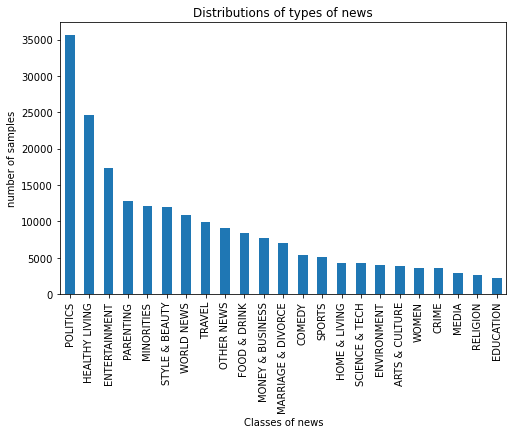

In [408]:
# distribution of 42 categories on bar chart
news_df['category'].value_counts().plot( kind='bar', figsize=(8,5))
plt.title('Distributions of types of news')
plt.xlabel('Classes of news')
plt.ylabel('number of samples')

From above we can see that we have reduced 42 number of categories at first to 23 number of categories. We have to check the accuarcy with these type of classification, if accuracy is quite low, then we have to merge some more categories into one.

So basically we are done with the EDA on the `category` column, which is our target variable. 

Let's check for the authors the same thing we did for the category column.

---

---

### EDA on `authors` column
<a class ='anchor' id = 'edaauthors' ></a>

In [409]:
# checking value counts for the authors
news_df['authors'].value_counts()

unknown                                                                   37326
Lee Moran                                                                 2954 
Ron Dicker                                                                2219 
Ed Mazza                                                                  1590 
Mary Papenfuss                                                            1566 
                                                                          ...  
Stephen Hawkins, AP                                                       1    
Olga R. Rodriguez, AP                                                     1    
Holly Ramer, Associated Press                                             1    
Gina Carey, The Huffington Post                                           1    
John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff    1    
Name: authors, Length: 29161, dtype: int64

Surprisingly most of the authors are unknown in the column and Lee Moran is the most populat one, followed by Ron Dicker and Ed Mazza

In [410]:
# description of authors
news_df[['authors']].describe().T

,count,unique,top,freq
authors,209323,29161,unknown,37326


From above we can see that there are 29161 unique number of authors in the `authors` column and most of the cells were empty strings which were replaced unknown authors.



Here we have put blindly unknown in the empty string of the `authors` column as far we are not dealing with this column while modelling. A lot of experimentation is needed while introducing things into the modelling. Same is with th `short_description` column. 

__Let's see that sometimes authors name is mis-spelled or can be different variations while writing name like, H. Sharma & Harsh S. represent the same author but are counted as two. So let's have a check for this.__

In [411]:
## checking for Lee Morgan
news_df[news_df['authors'].str.contains('Moran')]['authors'].value_counts()

Lee Moran                                                                                         2954
Joan Moran, ContributorCreative Thought Leader, author, blogger, creative thought lea...          5   
Tom Moran, Contributor\nFounder of Urban Ghosts, an online magazine about hidden histo...         3   
Robert Moran, ContributorRobert Moran leads Brunswick Insight, and writes and speaks on...        3   
Blake D. Morant, ContributorDean and Robert Kramer Research Professor of Law at GW Law, Pa...     2   
Victoria Moran, Contributor\nAuthor Main St. Vegan & The Good Karma Diet, director Main St....    2   
Lee Moran, Hilary Hanson, and Nick Robins-Early                                                   1   
Lydia O'Connor, Lee Moran, and Jesselyn Cook                                                      1   
Sarah Ruiz-Grossman and Lee Moran                                                                 1   
Tom Moran, ContributorFounder of Urban Ghosts, an online magazine about h

__IMPORTANT:__

__From above we can draw the following results:__
1. There can be multiple authors for a single news article.
2. Some of the rows have description of the authors too.
3. Though Lee Moran does not have any similar names but it can be seen that Lee Moran has appeared with other authors, making his/her appearnce in multiple rows.
4. Figuring out the above information, it would be very difficult to draw insights from the author column like which author is affliated to which type of news.

In [412]:
## checking for Lee Morgan
news_df[news_df['authors'].str.contains('Lee')]['authors'].value_counts()

Lee Moran                                                                                      2954
Lee Speigel                                                                                    44  
Lee Negroni, Contributor\nLaw prof, author, global adventure-seeker, emerging outdoorswo...    31  
Jennifer Tyler Lee, Contributor\nMom. Author. Healthy eating advocate.                         12  
Sarah H. Lee                                                                                   11  
                                                                                               ..  
By Se Young Lee, Reuters                                                                       1   
Lee Moran and Lydia O'Connor                                                                   1   
Damon Dahlen and Lee Moran                                                                     1   
Jacquie Lee and Mercy Yang                                                                     1   


Does not seem like there are strings were names of same person is different.

So basically we are good with any kind of problems like similar kind of name formats in the `authors` column.

##### Next steps:
1. Separate the authors and the work they do and do some further EDA on it.
2. We can gain a lot of information from the above EDA.

__Categories which have the highest number of unknown authors__

In [413]:
unknown_df = news_df[news_df["authors"] == 'unknown']

In [414]:
unknown_df['category'].value_counts()

HEALTHY LIVING        5354
MARRIAGE & DIVORCE    3679
POLITICS              3620
WORLD NEWS            3143
STYLE & BEAUTY        2597
PARENTING             2384
MINORITIES            2225
FOOD & DRINK          1860
ENTERTAINMENT         1779
TRAVEL                1405
ENVIRONMENT           1221
MONEY & BUSINESS      1205
CRIME                 975 
SPORTS                940 
SCIENCE & TECH        890 
OTHER NEWS            837 
HOME & LIVING         794 
COMEDY                729 
ARTS & CULTURE        421 
MEDIA                 391 
RELIGION              391 
WOMEN                 366 
EDUCATION             120 
Name: category, dtype: int64

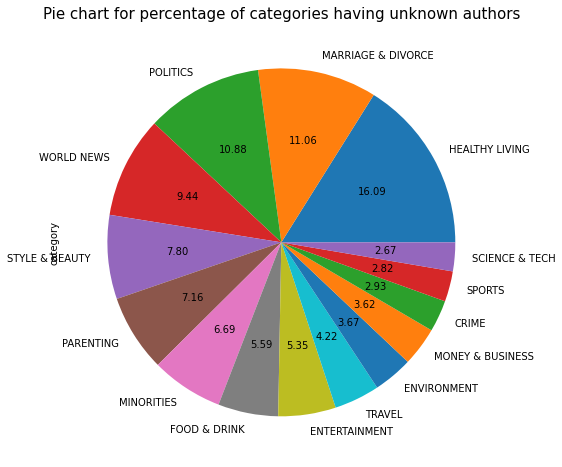

In [415]:
# pie chart for categories having unknown authors
plt.figure(figsize=(8,8))
unknown_df['category'].value_counts().sort_values(ascending=False)[:15].plot(kind='pie', autopct='%.2f')
plt.title('Pie chart for percentage of categories having unknown authors', fontsize=15)
plt.show()

From above we can see that HEALTHY LIVING, MARRIAGE & DIVORCE, POLITICS are the top 3 categories with the highest number of unknown authors in the dataset.

---

---

### EDA on `date` column
<a class ='anchor' id = 'edadate' ></a>

In [416]:
# separating the date column
news_df['year'] = news_df['date'].dt.year
news_df['month'] = news_df['date'].dt.month
news_df['day'] = news_df['date'].dt.day

In [417]:
# sanity check
news_df.head()

,headline,category,short_description,authors,date,year,month,day
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,WORLD NEWS,Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.,"Carla K. Johnson, AP",2022-09-23,2022,9,23
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",WORLD NEWS,"He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",Mary Papenfuss,2022-09-23,2022,9,23
2,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),COMEDY,"""Until you have a dog you don't understand what could be eaten.""",Elyse Wanshel,2022-09-23,2022,9,23
3,The Funniest Tweets From Parents This Week (Sept. 17-23),PARENTING,"""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce.""",Caroline Bologna,2022-09-23,2022,9,23
4,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,WORLD NEWS,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.,Nina Golgowski,2022-09-22,2022,9,22


Let's check the value counts of the year column.

In [418]:
# checking value counts for the years
news_df['year'].value_counts().sort_index()

2012    31227
2013    34575
2014    32326
2015    31983
2016    32082
2017    29875
2018    9734 
2019    2005 
2020    2052 
2021    2066 
2022    1398 
Name: year, dtype: int64

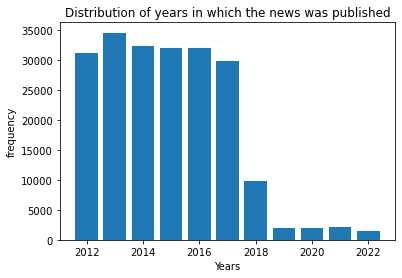

In [419]:
# plotting distribution
plt.figure()
plt.bar(news_df['year'].value_counts().index,
        news_df['year'].value_counts().values)
plt.xlabel('Years')
plt.ylabel('frequency')
plt.title('Distribution of years in which the news was published')
plt.show()

From above we can see that we have data from 2012 to 2022, basically 11 years. One interesting thing to note is that there is very less data in the last years. I assume that this can be maybe due to COVID, but I need to research more. 


Also the year 2022 is not over yet and maybe this year would make wrong results as we make results but let us di deeper and then if we feel that 2022 is not good for results then we'll drop it. 

Now let's check the value counts for the months in the overall period of 11 years.

In [420]:
# checking value counts for the months
news_df['month'].value_counts().sort_index()

1     17148
2     17867
3     19078
4     18265
5     18587
6     16964
7     17279
8     17383
9     16570
10    17215
11    16450
12    16517
Name: month, dtype: int64

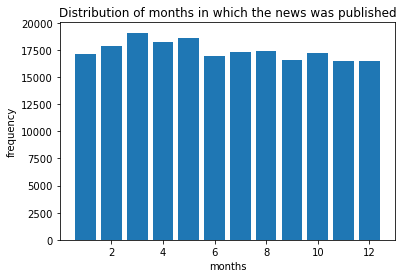

In [421]:
# plotting distribution
plt.figure()
plt.bar(news_df['month'].value_counts().index,
        news_df['month'].value_counts().values)
plt.xlabel('months')
plt.ylabel('frequency')
plt.title('Distribution of months in which the news was published')
plt.show()

It has fairly evenly distribution.

---

### 1.6 Calculating summary statistics for columns
<a class ='anchor' id = 'summarystatistics' ></a>

Let's calculate the length of the strings present in the headline and short_description columns.

In [422]:
# length of words in headline
news_df['headlinewords'] = news_df['headline'].str.split().str.len()

In [423]:
# sanity check
news_df.head()

,headline,category,short_description,authors,date,year,month,day,headlinewords
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,WORLD NEWS,Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.,"Carla K. Johnson, AP",2022-09-23,2022,9,23,11
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",WORLD NEWS,"He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",Mary Papenfuss,2022-09-23,2022,9,23,13
2,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),COMEDY,"""Until you have a dog you don't understand what could be eaten.""",Elyse Wanshel,2022-09-23,2022,9,23,13
3,The Funniest Tweets From Parents This Week (Sept. 17-23),PARENTING,"""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce.""",Caroline Bologna,2022-09-23,2022,9,23,9
4,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,WORLD NEWS,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.,Nina Golgowski,2022-09-22,2022,9,22,11


Looks cool right!! Let's draw some insights from this by doing some analysis over time.

In [424]:
# length of words in short_description
news_df['descriptionwords'] = news_df['short_description'].str.split().str.len()

In [425]:
# sanity check
news_df.head()

,headline,category,short_description,authors,date,year,month,day,headlinewords,descriptionwords
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,WORLD NEWS,Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.,"Carla K. Johnson, AP",2022-09-23,2022,9,23,11,29
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",WORLD NEWS,"He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",Mary Papenfuss,2022-09-23,2022,9,23,13,28
2,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),COMEDY,"""Until you have a dog you don't understand what could be eaten.""",Elyse Wanshel,2022-09-23,2022,9,23,13,12
3,The Funniest Tweets From Parents This Week (Sept. 17-23),PARENTING,"""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce.""",Caroline Bologna,2022-09-23,2022,9,23,9,25
4,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,WORLD NEWS,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.,Nina Golgowski,2022-09-22,2022,9,22,11,25


In [426]:
# description of the numerical columns in the dataset
news_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,209323.0,2014.839191,2.086984,2012.0,2013.0,2015.0,2016.0,2022.0
month,209323.0,6.393688,3.430048,1.0,3.0,6.0,9.0,12.0
day,209323.0,15.698934,8.782145,1.0,8.0,16.0,23.0,31.0
headlinewords,209323.0,9.600574,3.068073,1.0,8.0,10.0,12.0,44.0
descriptionwords,209323.0,20.533912,13.207698,1.0,11.0,19.0,24.0,243.0


Surprisingly, both `headlinewords` and `descriptionwords` columns have minimum value equal to 1. On average `headlinewords` is equal to 9.6 and `descriptionwords` equal to 20.5 

In [427]:
# let's see the value counts of the headline words
news_df['headlinewords'].value_counts(sort=True)

10    28130
11    26356
9     26315
8     22244
12    21081
7     17406
13    14725
6     13266
5     9222 
14    9006 
4     6066 
15    5171 
3     3333 
16    2715 
2     1428 
17    1286 
18    631  
19    300  
1     256  
20    172  
21    95   
22    50   
23    24   
24    15   
27    6    
25    6    
26    6    
28    6    
34    1    
44    1    
30    1    
38    1    
29    1    
31    1    
Name: headlinewords, dtype: int64

Let's plot this on a distribution plot.

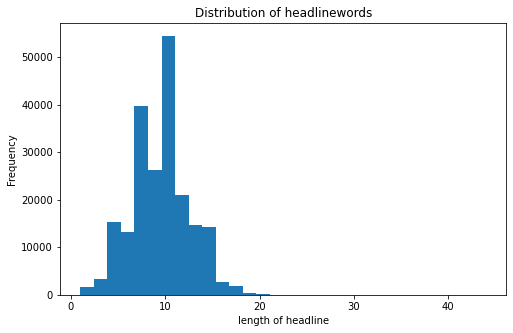

In [428]:
# distribution of length of headline
news_df['headlinewords'].plot(kind='hist', bins=30, figsize=(8, 5))
plt.xlabel('length of headline')
plt.title('Distribution of headlinewords')
plt.show()

Let's do the same for the `descriptionwords` column

In [429]:
# let's see the value counts of the headline words
news_df['descriptionwords'].value_counts(sort=True)

21     11909
20     11270
22     10682
19     9827 
10     8369 
       ...  
145    1    
208    1    
188    1    
212    1    
119    1    
Name: descriptionwords, Length: 180, dtype: int64

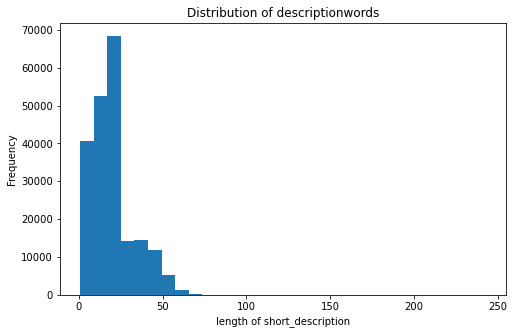

In [430]:
# distribution of length of description words
news_df['descriptionwords'].plot(kind='hist', bins=30, figsize=(8, 5))
plt.xlabel('length of short_description')
plt.title('Distribution of descriptionwords')
plt.show()

Let's plot both of these columns against the date columns and date, year, month and day.

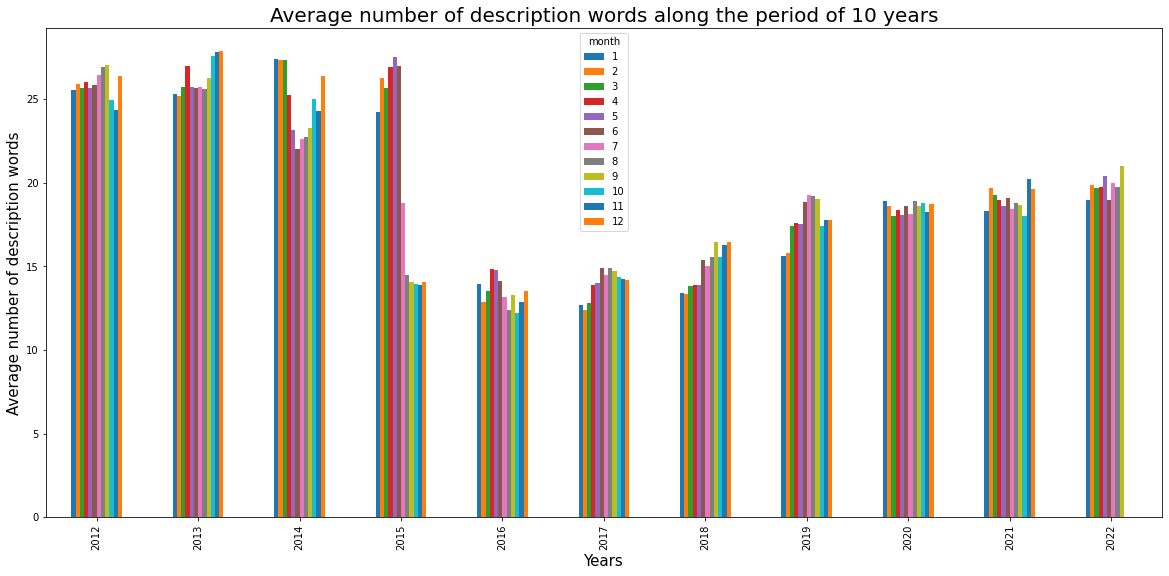

In [431]:
# Pivot the DF so that there's a column for each month, each row\
# represents a year, and the cells have the mean page views for the\
# respective year and month
df_pivot = pd.pivot_table(
           news_df,values="descriptionwords",index="year",columns="month",aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(20, 9)
# Change the axes labels
ax.set_xlabel("Years", fontsize=15)
ax.set_ylabel("Average number of description words", fontsize=15)
ax.set_title('Average number of description words along the period of 10 years', fontsize=20)

# Use this to show the plot in a new window
plt.show()
# Export the plot as a PNG file
#fig.savefig("page_views_barplot.png")

1. Average number of description words descreased a lot after mid 2015, resulting the lowest words in 2016 and 2017.
2. But after 2017 the average number increased till 2022.

Let's do the same thing for headline words also.

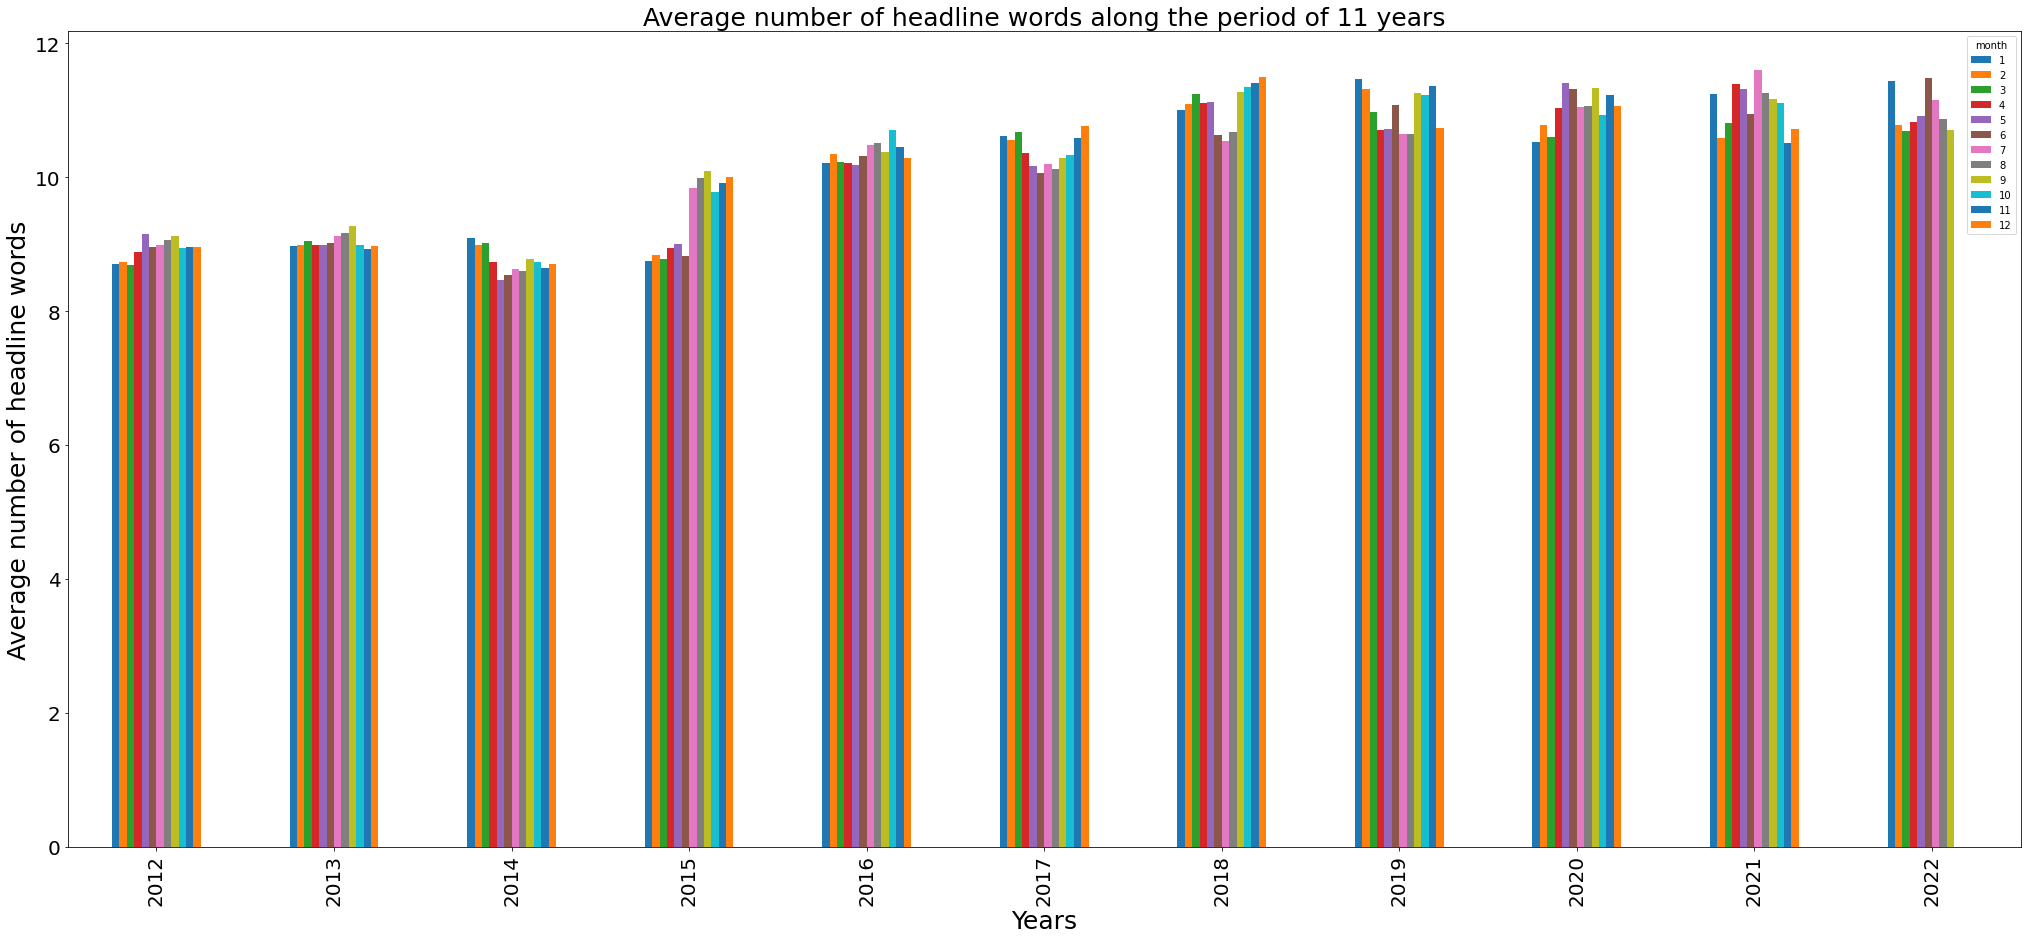

In [432]:
# Pivot the DF so that there's a column for each month, each row\
# represents a year, and the cells have the mean headlinewords views for the\
# respective year and month
df_pivot = pd.pivot_table(
           news_df,values="headlinewords",index="year",columns="month",aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(35, 15)
# Change the axes labels
ax.set_xlabel("Years", fontsize=25)
ax.set_ylabel("Average number of headline words", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_title('Average number of headline words along the period of 11 years', fontsize=25)

# Use this to show the plot in a new window
plt.show()

1. Along the years there is small amount of increase in the average number of words used in the headline.

---

### Plotting Value Distributions
<a class ='anchor' id = 'valuedistributions' ></a>

#### Length of text v/s Categories

<Figure size 720x360 with 0 Axes>

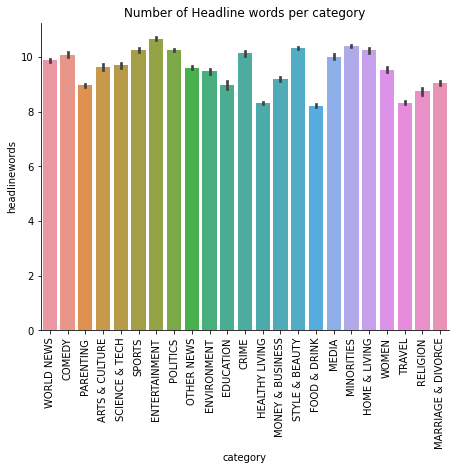

In [433]:
# for headline
plt.figure(figsize=(10,5))
sns.catplot(data= news_df, x = "category", y="headlinewords", kind='bar', height=5, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.title('Number of Headline words per category')
plt.show()

Not much variance but __FOOD & DRINK and HEALTHY LIVING__ have the least number of headline words.

Let's do the same for the `descriptionwords` as we did for the headline column.

<Figure size 720x360 with 0 Axes>

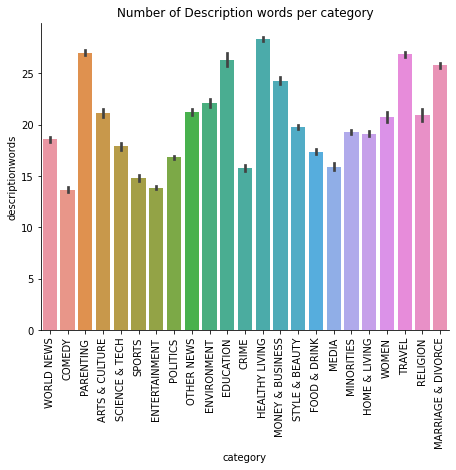

In [434]:
# for short_description
plt.figure(figsize=(10,5))
sns.catplot(data= news_df, x = "category", y="descriptionwords", kind='bar', height=5, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.title('Number of Description words per category')
plt.show()

1. __COMEDY and ENTERTAINMENT__ have the lowest number of description words.
2. __PARENTING and HEALTHY LIVING__ have the lowest number of description words.

---

In [435]:
# sanity check
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209323 entries, 0 to 209526
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   headline           209323 non-null  object        
 1   category           209323 non-null  object        
 2   short_description  209323 non-null  object        
 3   authors            209323 non-null  object        
 4   date               209323 non-null  datetime64[ns]
 5   year               209323 non-null  int64         
 6   month              209323 non-null  int64         
 7   day                209323 non-null  int64         
 8   headlinewords      209323 non-null  int64         
 9   descriptionwords   209323 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 17.6+ MB


Let's drop all the unwanted columns which are no longer required. All the necessary analysis has been done and let's focus on all the preprocessing of the text columns `headline` and `short_description`

In [436]:
# dropping unwanted columns
news_df.drop(['authors', 'date', 'year', 'month', 'day', 'headlinewords', 'descriptionwords'], axis=1, inplace=True)

In [437]:
# sanity check
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209323 entries, 0 to 209526
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   headline           209323 non-null  object
 1   category           209323 non-null  object
 2   short_description  209323 non-null  object
dtypes: object(3)
memory usage: 6.4+ MB


---

---

### Preprocessing the text data
<a class ='anchor' id = 'pretext' ></a>

Let's deal with only `headline` and `category` column

In [438]:
# assigning a new dataframe
main_df = news_df[['headline', 'category', 'short_description']]

In [439]:
# checking shape
main_df.shape

(209323, 3)

There can be many unwanted texts or signs in the `headline` column which would not make any sense to the maening of the text. 



There are number of ways to check these kind of noise in the text, so let's explore them one by one and keep on cleaning till we get a satisfied clean data. Note, here we have not done any train-test split and are excluding all the noise from the whole dataset.

#### Identifying Noise with regular expressions

In [440]:
# let's make a fnction for it
import re
RE_SUSPICIOUS = re.compile(r'[&#<>{}\[\]\\]')
def impurity(text, min_len=10):
 """returns the share of suspicious characters in a text"""
 if text == None or len(text) < min_len:
     return 0
 else:
     return len(RE_SUSPICIOUS.findall(text))/len(text)

Apply this to the `headline` column of the dataset and see the impurity we have.

In [441]:
# add new column to data frame
main_df['impurity'] = main_df['headline'].apply(impurity)

In [442]:
# get the top 10 records
main_df[['headline', 'impurity']].sort_values(by='impurity', ascending=False).head(10)

,headline,impurity
35042,Days Since News Of An Impeachable Scandal: [0][0][0][1],0.145455
28002,"#OnlyYou, #TeamSmokey",0.095238
169302,Being [On] a Vacation,0.095238
203759,Wedding Q&A,0.090909
124830,#BecauseLove,0.083333
99996,#HBCUsMatter,0.083333
208056,Heart & Home,0.083333
44772,#WhyWeMarched,0.076923
207184,The Last PB&J,0.076923
105430,Merchants of Doubt [VIDEO],0.076923


Impurtities are not that bad in the text as just one headline text has impurity more than 0.1


Let's clean these impurities and then check again.

#### Removing noice or impurities with regular expressions
<a class ='anchor' id = 'remnoise' ></a>

In [443]:
# let;s define a function for this
import html
def clean(text):
 # convert html escapes like &amp; to characters.
 text = html.unescape(text)
 # tags like <tab>
 text = re.sub(r'<[^<>]*>', ' ', text)
 # markdown URLs like [Some text](https://....)
 text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
 # text or code in brackets like [0]
 text = re.sub(r'\[[^\[\]]*\]', ' ', text)
 # standalone sequences of specials, matches &# but not #cool
 text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
 # standalone sequences of hyphens like --- or ==
 text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
 # sequences of white spaces
 text = re.sub(r'\s+', ' ', text)
 return text.strip()

Now let's apply this to the `headline` column of the dataset.


In [444]:
# applying the function on the column
main_df['clean_headline'] = main_df['headline'].apply(clean)
main_df['impurity'] = main_df['clean_headline'].apply(impurity, min_len=20)
main_df[['clean_headline', 'impurity']].sort_values(by='impurity', ascending=False).head(10)

,clean_headline,impurity
28002,"#OnlyYou, #TeamSmokey",0.095238
191007,You're So #$%&ing Predictable,0.068966
120189,Tiny Changes {Today's Buddha Doodle},0.055556
27409,#ThisIsNotUs But #ThisIsAlsoWhoWeAre,0.055556
114796,Q&A: Anjelica Huston,0.050000
121099,#childrennotsoldiers,0.050000
187239,The Perfect Gift: #1,0.050000
73109,Radio Host Pranks The $%#& Out of Co-Host,0.048780
193129,'A (Very) Little R&R',0.047619
137013,#BanBossy... LOVE IT!,0.047619


Still ntot cleaned, let's clean more....

#### Character Normalisation with textacy
<a class ='anchor' id = 'textacy' ></a>

In [445]:
pip install textacy

Note: you may need to restart the kernel to use updated packages.


The following link is the documentation for the textacy package.
[Textacy](https://textacy.readthedocs.io/en/0.12.0/api_reference/preprocessing.html#textacy.preprocessing.normalize.repeating_chars)

In [446]:
import textacy.preprocessing as tprep
def normalize(text):
    
 text = tprep.normalize.hyphenated_words(text)
 text = tprep.normalize.quotation_marks(text)
 text = tprep.normalize.unicode(text)
 text = tprep.remove.accents(text)
 text = tprep.normalize.bullet_points(text)
 #text = tprep.normalize.repeating_chars(text, *, chars: str)
 text = tprep.normalize.whitespace(text)
 text = tprep.remove.html_tags(text)
 text = tprep.remove.punctuation(text)
 #text = tprep.replace.currency_symbols(text) 
 #text = tprep.replace.emails(text)
 #text = tprep.replace.emojis(text)
 #text = tprep.replace.urls(text)
 text = tprep.remove.punctuation(text)
 text = tprep.remove.punctuation(text)

 return text

In [447]:
# applying the function on the column
main_df['clean_headline2'] = main_df['clean_headline'].apply(normalize)

In [448]:
# sanity check
main_df

,headline,category,short_description,impurity,clean_headline,clean_headline2
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,WORLD NEWS,Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.,0.0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,Over 4 Million Americans Roll Up Sleeves For Omicron Targeted COVID Boosters
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",WORLD NEWS,"He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",0.0,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",American Airlines Flyer Charged Banned For Life After Punching Flight Attendant On Video
2,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),COMEDY,"""Until you have a dog you don't understand what could be eaten.""",0.0,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),23 Of The Funniest Tweets About Cats And Dogs This Week Sept 17 23
3,The Funniest Tweets From Parents This Week (Sept. 17-23),PARENTING,"""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce.""",0.0,The Funniest Tweets From Parents This Week (Sept. 17-23),The Funniest Tweets From Parents This Week Sept 17 23
4,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,WORLD NEWS,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.,0.0,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,Woman Who Called Cops On Black Bird Watcher Loses Lawsuit Against Ex Employer
...,...,...,...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans For BlackBerry,SCIENCE & TECH,Verizon Wireless and AT&T are already promoting LTE devices including smartphones and tablets from RIM's rivals. RIM's first,0.0,RIM CEO Thorsten Heins' 'Significant' Plans For BlackBerry,RIM CEO Thorsten Heins Significant Plans For BlackBerry
209523,Maria Sharapova Stunned By Victoria Azarenka In Australian Open Final,SPORTS,"Afterward, Azarenka, more effusive with the press than normal, credited her coach of two years, Sam Sumyk, for his patient",0.0,Maria Sharapova Stunned By Victoria Azarenka In Australian Open Final,Maria Sharapova Stunned By Victoria Azarenka In Australian Open Final
209524,"Giants Over Patriots, Jets Over Colts Among Most Improbable Super Bowl Upsets Of All Time (VIDEOS)",SPORTS,"Leading up to Super Bowl XLVI, the most talked about game could end up being one that occurred a few years ago. After all",0.0,"Giants Over Patriots, Jets Over Colts Among Most Improbable Super Bowl Upsets Of All Time (VIDEOS)",Giants Over Patriots Jets Over Colts Among Most Improbable Super Bowl Upsets Of All Time VIDEOS
209525,Aldon Smith Arrested: 49ers Linebacker Busted For DUI,SPORTS,CORRECTION: An earlier version of this story incorrectly stated the location of KTVU and the 2011 league leader in sacks,0.0,Aldon Smith Arrested: 49ers Linebacker Busted For DUI,Aldon Smith Arrested 49ers Linebacker Busted For DUI


This was what we wanted, but we can see that there are numbers in the text which do not make anyb sense to the text, let's delete them using regular expressions.

In [449]:
# regex removes all the numbers from the text
main_df.clean_headline2.replace('\d+', '', regex=True, inplace=True)

In [450]:
# sanity check
main_df

,headline,category,short_description,impurity,clean_headline,clean_headline2
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,WORLD NEWS,Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.,0.0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,Over Million Americans Roll Up Sleeves For Omicron Targeted COVID Boosters
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",WORLD NEWS,"He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",0.0,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",American Airlines Flyer Charged Banned For Life After Punching Flight Attendant On Video
2,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),COMEDY,"""Until you have a dog you don't understand what could be eaten.""",0.0,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),Of The Funniest Tweets About Cats And Dogs This Week Sept
3,The Funniest Tweets From Parents This Week (Sept. 17-23),PARENTING,"""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce.""",0.0,The Funniest Tweets From Parents This Week (Sept. 17-23),The Funniest Tweets From Parents This Week Sept
4,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,WORLD NEWS,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.,0.0,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,Woman Who Called Cops On Black Bird Watcher Loses Lawsuit Against Ex Employer
...,...,...,...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans For BlackBerry,SCIENCE & TECH,Verizon Wireless and AT&T are already promoting LTE devices including smartphones and tablets from RIM's rivals. RIM's first,0.0,RIM CEO Thorsten Heins' 'Significant' Plans For BlackBerry,RIM CEO Thorsten Heins Significant Plans For BlackBerry
209523,Maria Sharapova Stunned By Victoria Azarenka In Australian Open Final,SPORTS,"Afterward, Azarenka, more effusive with the press than normal, credited her coach of two years, Sam Sumyk, for his patient",0.0,Maria Sharapova Stunned By Victoria Azarenka In Australian Open Final,Maria Sharapova Stunned By Victoria Azarenka In Australian Open Final
209524,"Giants Over Patriots, Jets Over Colts Among Most Improbable Super Bowl Upsets Of All Time (VIDEOS)",SPORTS,"Leading up to Super Bowl XLVI, the most talked about game could end up being one that occurred a few years ago. After all",0.0,"Giants Over Patriots, Jets Over Colts Among Most Improbable Super Bowl Upsets Of All Time (VIDEOS)",Giants Over Patriots Jets Over Colts Among Most Improbable Super Bowl Upsets Of All Time VIDEOS
209525,Aldon Smith Arrested: 49ers Linebacker Busted For DUI,SPORTS,CORRECTION: An earlier version of this story incorrectly stated the location of KTVU and the 2011 league leader in sacks,0.0,Aldon Smith Arrested: 49ers Linebacker Busted For DUI,Aldon Smith Arrested ers Linebacker Busted For DUI


Looks even more good!


In [451]:
main_df.drop(columns=['headline', 'clean_headline', 'impurity'], inplace=True)

In [452]:
main_df

,category,short_description,clean_headline2
0,WORLD NEWS,Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.,Over Million Americans Roll Up Sleeves For Omicron Targeted COVID Boosters
1,WORLD NEWS,"He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",American Airlines Flyer Charged Banned For Life After Punching Flight Attendant On Video
2,COMEDY,"""Until you have a dog you don't understand what could be eaten.""",Of The Funniest Tweets About Cats And Dogs This Week Sept
3,PARENTING,"""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce.""",The Funniest Tweets From Parents This Week Sept
4,WORLD NEWS,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.,Woman Who Called Cops On Black Bird Watcher Loses Lawsuit Against Ex Employer
...,...,...,...
209522,SCIENCE & TECH,Verizon Wireless and AT&T are already promoting LTE devices including smartphones and tablets from RIM's rivals. RIM's first,RIM CEO Thorsten Heins Significant Plans For BlackBerry
209523,SPORTS,"Afterward, Azarenka, more effusive with the press than normal, credited her coach of two years, Sam Sumyk, for his patient",Maria Sharapova Stunned By Victoria Azarenka In Australian Open Final
209524,SPORTS,"Leading up to Super Bowl XLVI, the most talked about game could end up being one that occurred a few years ago. After all",Giants Over Patriots Jets Over Colts Among Most Improbable Super Bowl Upsets Of All Time VIDEOS
209525,SPORTS,CORRECTION: An earlier version of this story incorrectly stated the location of KTVU and the 2011 league leader in sacks,Aldon Smith Arrested ers Linebacker Busted For DUI


In [453]:
main_df = main_df.rename(columns={'clean_headline2': 'headline'})

In [455]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209323 entries, 0 to 209526
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           209323 non-null  object
 1   short_description  209323 non-null  object
 2   headline           209323 non-null  object
dtypes: object(3)
memory usage: 6.4+ MB


Let' do the same for `short_description` also and see the results of the models to see if adding this column increases the accuracy

In [456]:
# applying the function on the column
main_df['clean_description'] = main_df['short_description'].apply(clean)

In [457]:
# applying the function on the column
main_df['clean_description2'] = main_df['clean_description'].apply(normalize)

In [458]:
# regex removes all the numbers from the text
main_df.clean_description2.replace('\d+', '', regex=True, inplace=True)

In [459]:
main_df.drop(columns=['short_description', 'clean_description'], inplace=True)

In [460]:
main_df = main_df.rename(columns={'clean_description2': 'description'})

In [461]:
main_df.head()

,category,headline,description
0,WORLD NEWS,Over Million Americans Roll Up Sleeves For Omicron Targeted COVID Boosters,Health experts said it is too early to predict whether demand would match up with the million doses of the new boosters the U S ordered for the fall
1,WORLD NEWS,American Airlines Flyer Charged Banned For Life After Punching Flight Attendant On Video,He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation according to the U S attorney s office in Los Angeles
2,COMEDY,Of The Funniest Tweets About Cats And Dogs This Week Sept,Until you have a dog you don t understand what could be eaten
3,PARENTING,The Funniest Tweets From Parents This Week Sept,Accidentally put grown up toothpaste on my toddler s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce
4,WORLD NEWS,Woman Who Called Cops On Black Bird Watcher Loses Lawsuit Against Ex Employer,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral


---

### Polarity of the `headline` column (Sentiment analysis)
<a class ='anchor' id = 'polarity' ></a>

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

In [462]:
# defining function for polarity of text
def polarity_txt(text):
  return TextBlob(text).sentiment[0]

In [472]:
# applying to the dataset
main_df['polarity'] = main_df['headline'].apply(polarity_txt)
main_df.head(2)

,category,headline,description,polarity
0,WORLD NEWS,Over Million Americans Roll Up Sleeves For Omicron Targeted COVID Boosters,Health experts said it is too early to predict whether demand would match up with the million doses of the new boosters the U S ordered for the fall,0.0
1,WORLD NEWS,American Airlines Flyer Charged Banned For Life After Punching Flight Attendant On Video,He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation according to the U S attorney s office in Los Angeles,0.1


[Text(0, 0, 'WORLD NEWS'),
 Text(1, 0, 'COMEDY'),
 Text(2, 0, 'PARENTING'),
 Text(3, 0, 'ARTS & CULTURE'),
 Text(4, 0, 'SCIENCE & TECH'),
 Text(5, 0, 'SPORTS'),
 Text(6, 0, 'ENTERTAINMENT'),
 Text(7, 0, 'POLITICS'),
 Text(8, 0, 'OTHER NEWS'),
 Text(9, 0, 'ENVIRONMENT'),
 Text(10, 0, 'EDUCATION'),
 Text(11, 0, 'CRIME'),
 Text(12, 0, 'HEALTHY LIVING'),
 Text(13, 0, 'MONEY & BUSINESS'),
 Text(14, 0, 'STYLE & BEAUTY'),
 Text(15, 0, 'FOOD & DRINK'),
 Text(16, 0, 'MEDIA'),
 Text(17, 0, 'MINORITIES'),
 Text(18, 0, 'HOME & LIVING'),
 Text(19, 0, 'WOMEN'),
 Text(20, 0, 'TRAVEL'),
 Text(21, 0, 'RELIGION'),
 Text(22, 0, 'MARRIAGE & DIVORCE')]

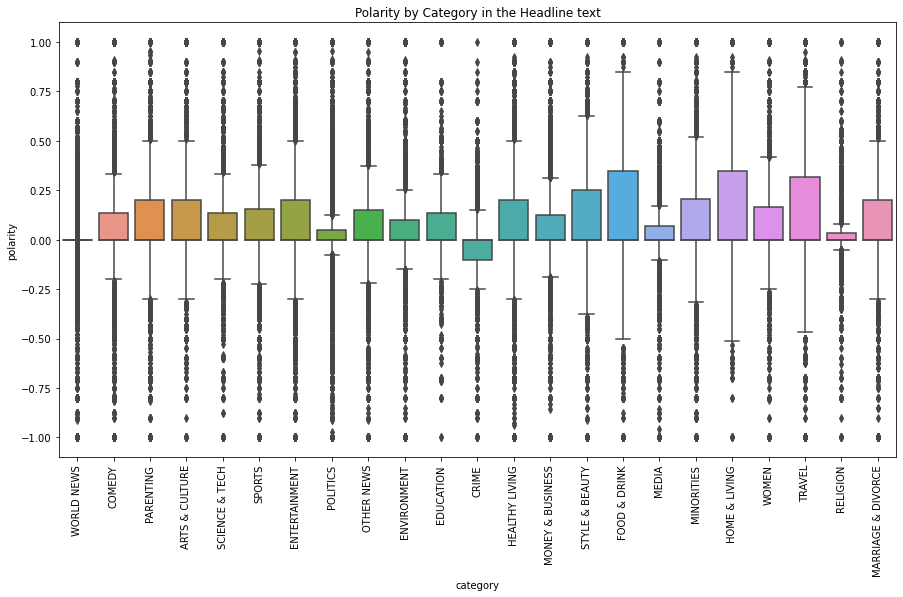

In [478]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="category", y="polarity", data=main_df)
ax.set_title('Polarity by Category in the Headline text')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#### Interpretations:

1. __FOOD & DRINK__ and __HOME & LIVING__ have the highest positive polarity which means that there are much positive words in the text of the `headline` column.
2. __CRIME__ has polarity in negative which is expected.

---

### Subjectivity of the headline column
<a class ='anchor' id = 'subjectivity' ></a>

In [471]:
# defining subjectivity of text
def subj_txt(text):
  return  TextBlob(text).sentiment[1]

In [475]:
# applying to the main dataset
main_df['subjectivity'] = main_df['headline'].apply(subj_txt)
main_df.head(2)

,category,headline,description,polarity,subjectivity
0,WORLD NEWS,Over Million Americans Roll Up Sleeves For Omicron Targeted COVID Boosters,Health experts said it is too early to predict whether demand would match up with the million doses of the new boosters the U S ordered for the fall,0.0,0.0
1,WORLD NEWS,American Airlines Flyer Charged Banned For Life After Punching Flight Attendant On Video,He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation according to the U S attorney s office in Los Angeles,0.1,0.2


[Text(0, 0, 'WORLD NEWS'),
 Text(1, 0, 'COMEDY'),
 Text(2, 0, 'PARENTING'),
 Text(3, 0, 'ARTS & CULTURE'),
 Text(4, 0, 'SCIENCE & TECH'),
 Text(5, 0, 'SPORTS'),
 Text(6, 0, 'ENTERTAINMENT'),
 Text(7, 0, 'POLITICS'),
 Text(8, 0, 'OTHER NEWS'),
 Text(9, 0, 'ENVIRONMENT'),
 Text(10, 0, 'EDUCATION'),
 Text(11, 0, 'CRIME'),
 Text(12, 0, 'HEALTHY LIVING'),
 Text(13, 0, 'MONEY & BUSINESS'),
 Text(14, 0, 'STYLE & BEAUTY'),
 Text(15, 0, 'FOOD & DRINK'),
 Text(16, 0, 'MEDIA'),
 Text(17, 0, 'MINORITIES'),
 Text(18, 0, 'HOME & LIVING'),
 Text(19, 0, 'WOMEN'),
 Text(20, 0, 'TRAVEL'),
 Text(21, 0, 'RELIGION'),
 Text(22, 0, 'MARRIAGE & DIVORCE')]

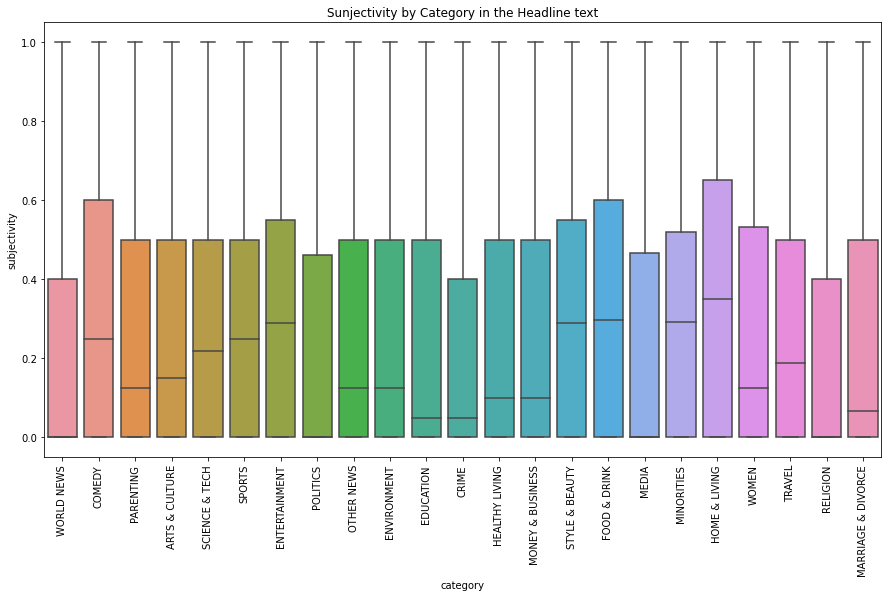

In [477]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="category", y="subjectivity", data=main_df)
ax.set_title('Sunjectivity by Category in the Headline text')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Subjectivity term refers to the sentiment of opinion versus factual information. More is the value of sentiment closer to one more the sentiment of the text is opinion based information, whereas more is the value of the subjectivity closer to zero more the sentiment of the text is factual information.



From above, __COMEDY__, __FOOD & DRINK__ and __HOME & LIVING__ are the ones which have more opinion based information and __WORLD NEWS__ and __CRIME__ are the ones which have more factual based information.

---

Let's delete all the unwanted columns.

In [482]:
# check
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209323 entries, 0 to 209526
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   category     209323 non-null  object
 1   headline     209323 non-null  object
 2   description  209323 non-null  object
dtypes: object(3)
memory usage: 6.4+ MB


In [480]:
# dropping columns
main_df.drop(columns=['polarity', 'subjectivity'], inplace=True)

In [481]:
#sanity check
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209323 entries, 0 to 209526
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   category     209323 non-null  object
 1   headline     209323 non-null  object
 2   description  209323 non-null  object
dtypes: object(3)
memory usage: 6.4+ MB


---

Let's save the file in the system to work on modelling.

In [155]:
# saving to desktop
#main_df.to_csv('C:/Users/user/Desktop/finaldata.csv', index = False)

The above data contains `short_description` column also

In [138]:
# saving to desktop
#main_df.to_csv('C:/Users/user/Desktop/file_name.csv', index = False)

The above csv file does not contain `short_description` column.

After converting to csv, I figured out there are some null values. Let's figure out.


In [140]:
#bat = pd.read_csv('file_name.csv')

In [142]:
#bat.head()

,category,headline
0,WORLD NEWS,Over Million Americans Roll Up Sleeves For Omicron Targeted COVID Boosters
1,WORLD NEWS,American Airlines Flyer Charged Banned For Life After Punching Flight Attendant On Video
2,COMEDY,Of The Funniest Tweets About Cats And Dogs This Week Sept
3,PARENTING,The Funniest Tweets From Parents This Week Sept
4,WORLD NEWS,Woman Who Called Cops On Black Bird Watcher Loses Lawsuit Against Ex Employer


In [143]:
#bat.isna().sum()

category    0 
headline    29
dtype: int64

In [144]:
# sanity check
#main_df.isna().sum()

category    0
headline    0
dtype: int64

In [150]:
#main_df.loc[main_df['headline'].str.strip().apply(len)==0,:]

,category,headline
4875,ENTERTAINMENT,
25867,HEALTHY LIVING,
28452,STYLE & BEAUTY,
32049,HEALTHY LIVING,
50027,STYLE & BEAUTY,
60328,MINORITIES,
72392,MINORITIES,
80331,MINORITIES,
88582,SPORTS,
104546,MONEY & BUSINESS,


I deleted these rows in all the modelling files.


---

## Vectorization using TF-IDF
<a class ='anchor' id = 'tfidf' ></a>

---

Let's define our X and y first.

In [135]:
# instantiating our independent and dependent variables 
X = main_df.drop(columns="category")
y = main_df[['category']]

In [136]:
y = main_df[['category']]

In [137]:
X['headline']

0         Over  Million Americans Roll Up Sleeves For Omicron Targeted COVID Boosters                       
1         American Airlines Flyer Charged  Banned For Life After Punching Flight Attendant On Video         
2          Of The Funniest Tweets About Cats And Dogs This Week  Sept                                       
3         The Funniest Tweets From Parents This Week  Sept                                                  
4         Woman Who Called Cops On Black Bird Watcher Loses Lawsuit Against Ex Employer                     
                                              ...                                                           
209522    RIM CEO Thorsten Heins   Significant  Plans For BlackBerry                                        
209523    Maria Sharapova Stunned By Victoria Azarenka In Australian Open Final                             
209524    Giants Over Patriots  Jets Over Colts Among Most Improbable Super Bowl Upsets Of All Time  VIDEOS 
209525    Aldon Smi

In [138]:
X.shape

(209323, 1)

In [139]:
y.shape

(209323, 1)

We have now defined our X and y, now, let's divide the dataset and into 72%-33% split and start vectorizing the `headline` column using TF-IDF.

In [165]:
# splitting into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [166]:
# checking train set shape
X_train.shape

(146526, 1)

In [167]:
# checking test set shape
X_test.shape

(62797, 1)

All set, let's convert the headline column to numeric using TF-IDF.

### TF-IDF

#### Steps of converting text data into numerics:

- **Tokenizing**: Something that might have come up in Exercise 1 is the issue of punctuation. Do we include that in the token or just remove it? This is a common issue in NLP, along with a few other problems when we talk about *tokenizing* text data. 


- **Stop word removal**: You might have also considered how to deal with common stop words (and, or, the, etc.). These words are very common in language and usually link parts of sentences rather than conveying particular meaning or information. 


- **Stemming and lemmatization**: Another example is actually modifying the unique words like shortening words from *working* to *work* to try and reduce the number of columns in the matrix and encode commonality between sentences like: 


### Converting `headline` to numeric

#### Tokenizing
<a class ='anchor' id = 'token' ></a>

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [154]:
# 1. Instantiate 
bagofwords = TfidfVectorizer(min_df=40) # min_df=50 excludes tokens which are less than 50 in any of the texts

# 2. Fit 
bagofwords.fit(X_train['headline'])

# 3. Transform
X_train_transformed = bagofwords.transform(X_train['headline'])
X_train_transformed

<146526x4356 sparse matrix of type '<class 'numpy.float64'>'
	with 1120306 stored elements in Compressed Sparse Row format>

In [155]:
# converting the sparse matrix into a numpy array
X_train_transformed.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

__Note:__ Test set has to be transformed every time train set is transformed. If we don't do the transformation on the test set, the model metrics and results are not what it should be expected.


Let's transform the test column.

In [156]:
# doing same operation on text data too
X_test_transformed = bagofwords.transform(X_test['headline'])
X_test_transformed

<62797x4356 sparse matrix of type '<class 'numpy.float64'>'
	with 479042 stored elements in Compressed Sparse Row format>

Now let's look at the words I have in the bagofwords we have in the whole `headline` column.

In [157]:
# list of all the words in the bagofwords
bagofwords.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron',
 'abandoned',
 'abc',
 'ability',
 'able',
 'abortion',
 'abortions',
 'about',
 'above',
 'abroad',
 'absolutely',
 'abuse',
 'academy',
 'accept',
 'acceptance',
 'access',
 'accessories',
 'accident',
 'accidentally',
 'according',
 'account',
 'accounts',
 'accusations',
 'accused',
 'accuser',
 'accuses',
 'achieve',
 'aclu',
 'across',
 'act',
 'acting',
 'action',
 'active',
 'activism',
 'activist',
 'activists',
 'activities',
 'activity',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'addicted',
 'addiction',
 'address',
 'addresses',
 'adds',
 'adele',
 'adhd',
 'administration',
 'admit',
 'admits',
 'adoption',
 'adorable',
 'adorably',
 'ads',
 'adult',
 'adults',
 'adventure',
 'adventures',
 'advice',
 'adviser',
 'advocates',
 'affair',
 'affect',
 'affected',
 'affects',
 'affleck',
 'afford',
 'affordable',
 'afghan',
 'afghanistan',
 'afraid',
 'africa',
 'african',
 'after',
 'aftermath',
 'again',
 'against',


It's important thing to note that so far we have done nothing in the editting the bagofwords. It contains all kind of words. The only we did is assigning `min_df` equal to 50.

As we can see that there are so many tokens in the bagofwords, that are, numbers, signs(quatation marks, escalamation marks, hyphens, dots). All these things do not make any sense to the text esspaecially to the kind of data we are handling. So let's drop all such things and then proceed further.

Now let's assign indices to all the words in the bagofwords.

In [158]:
# assigned indices
words = bagofwords.get_feature_names()
some_indices = range(1, 4356, round(4356/10)) # just pick some indices
samples = [words[i] for i in some_indices]
print(samples)

['abandoned', 'bombing', 'covered', 'evolution', 'head', 'launch', 'negative', 'provide', 'shooting', 'timberlake']


In [159]:
# display counts in a dataset
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

,abandoned,bombing,covered,evolution,head,launch,negative,provide,shooting,timberlake
total_corpus_count,41.969785,41.534095,20.341858,107.052428,131.303224,61.383752,26.287979,22.87091,238.826379,33.994759


Let's actually see the number of words in the bagofwords.

In [160]:
# totel tokens in Positive_Review column
len(bagofwords.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4356

In [161]:
print(f'There are {len(bagofwords.get_feature_names())} words in bagofwords')

There are 4356 words in bagofwords


Let's try to convert the transformed X_train into a array, if the size if not that too huge.

In [162]:
# convert to array
X_train_transformed.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Let's do the fun thing now. Let's find out the most frequently occuring in the `headline` column.

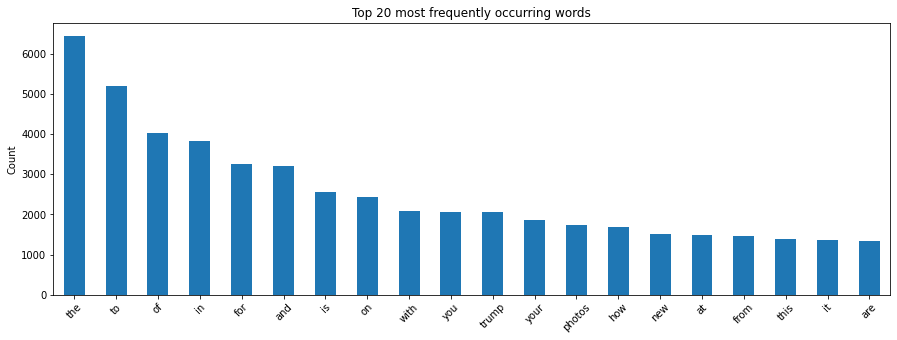

In [163]:
# bar graph showing most number of word appearences in the column
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### Interpretations from the above graph:

1. "the" is the most occuring word in the whole headline column
2. Most of the words are the words which connect the sentences and don't literraly have any meaning to the text.
3. There seems word "trump" appears almost 3000 word counts. Would be interesting to see in which categories does trump appear.

So why not remove stop words nows....

#### Stop words removal
<a class ='anchor' id = 'stop' ></a>

In [166]:
# removing stop words
bagofwords = TfidfVectorizer(stop_words="english", min_df=40)
bagofwords.fit(X_train['headline'])

X_train_transformed = bagofwords.transform(X_train['headline']) 
X_test_transformed = bagofwords.transform(X_test['headline']) 

X_train_transformed.shape

(146526, 4127)

In [167]:
print(f'There are {X_train_transformed.shape[0]} rows and {X_train_transformed.shape[1]} columns in the dataset.')

There are 146526 rows and 4127 columns in the dataset.


Let's see the graph again and see the changes...

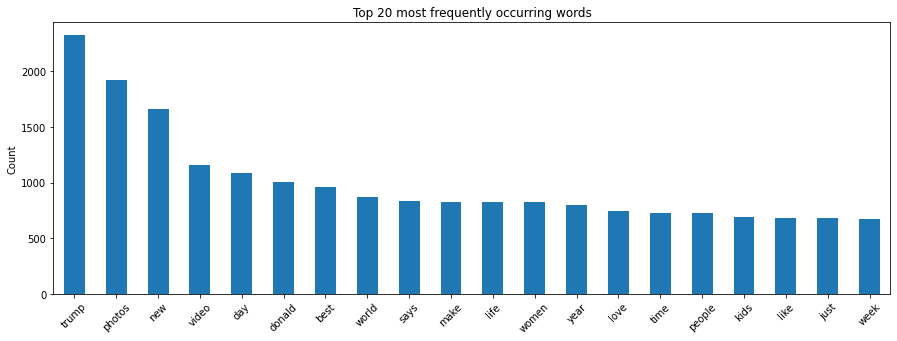

In [168]:
# let's plot the bar graph again to see most occured words
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Wooow.. "trump" is the most appearing word and "donald" is the 5th most appearing. Seems most of the news articles contained news about Donald Trump.

So far we have converted the `headline` column into tokens and remove the stop words. Basically we are done with the first 2 steps of pre-processing the text data. 


Let's do __stemming__ and __lemmitisation.__

#### Stemming and Lemmitisation
<a class ='anchor' id = 'stem' ></a>

In [169]:
import nltk

# Let's test it out
stemmer = nltk.stem.PorterStemmer()

[stemmer.stem(i) for i in ['run', 'runs', 'running', 'ran', 'jogged', 'jogging', 'jogs']]

['run', 'run', 'run', 'ran', 'jog', 'jog', 'jog']

Let's put stemming into our bagofwords.

In [171]:
# putting stemming into our bagofwords function
bagofwords = TfidfVectorizer(min_df=40, 
                             tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                             stop_words='english')
bagofwords.fit(X_train['headline'])

X_train_transformed = bagofwords.transform(X_train['headline'])
X_test_transformed = bagofwords.transform(X_test['headline'])

Now that we have transformed the bagofwords model, let's plot the bar graph again for the most frequent words.

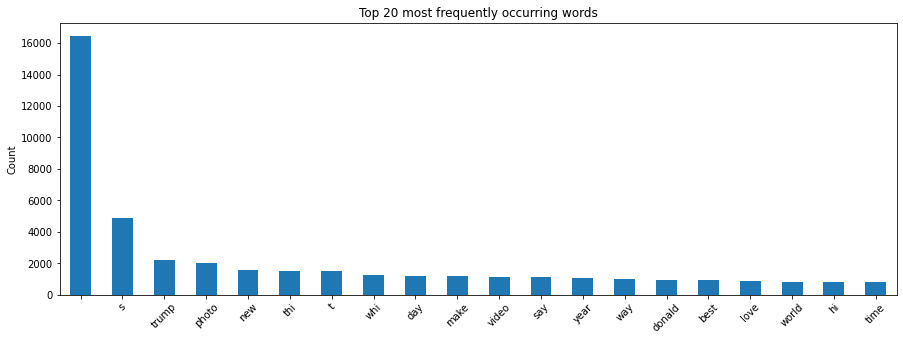

In [172]:
# bar graph for most frequent words
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Looks like it performed very poorly.

Let's remove any punctuation marks present in the `headline` text. Punctuation marks create a different column but does not help in making model better.

In [173]:
# the python string package has a helpful punctuation list
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [174]:
# a dummy sentence used for checking our process
sentence = "The quick brown fox, jumped over the lazy dog!!"

# after splitting the text based on spaces
split_sentence = sentence.split(' ')

# we stem and remove punctuation
tokenized_sentence = []
for word in split_sentence:
    for punctuation_mark in string.punctuation:
        word = word.replace(punctuation_mark, '')
    stemmed_word = stemmer.stem(word)
    tokenized_sentence.append(stemmed_word)
    
print(tokenized_sentence)

['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog']


Now let's build a customizable tokenizer including all the steps we have done before and also include the above function.

#### Custom Tokenizer
<a class ='anchor' id = 'custom' ></a>

In [175]:
# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Our function is ready, let's test on a sentence.

In [176]:
# checking tokenizer on simple sentence from above
my_tokenizer(sentence)

['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']

Success! Let's use this on our bagofwords model.

In [178]:
# let's do it for our `Positive_Review` column
bagofwords = TfidfVectorizer(min_df=40, 
                             tokenizer=my_tokenizer)
bagofwords.fit(X_train['headline'])

X_train_transformed = bagofwords.transform(X_train['headline'])
X_test_transformed = bagofwords.transform(X_test['headline'])

X_train_transformed.shape

(146526, 3685)

In [179]:
# Look at the shape of the dataframe
print(f'There are {X_train_transformed.shape[0]} rows and {X_train_transformed.shape[1]} columns in the dataset.')

There are 146526 rows and 3685 columns in the dataset.


Let's make the bar graph again for the most occuring words in the `headline` column.

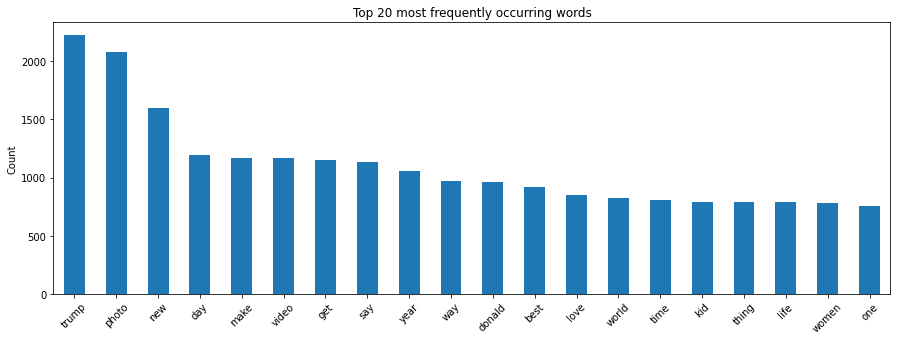

In [180]:
# let's make the bar graph again
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The above graph kind of makes sense now, however "trump" is still the most frequent word in the dataset.

In [181]:
# checking final shape
X_train_transformed

<146526x3685 sparse matrix of type '<class 'numpy.float64'>'
	with 811022 stored elements in Compressed Sparse Row format>

In [182]:
# checking final shape
X_test_transformed

<62797x3685 sparse matrix of type '<class 'numpy.float64'>'
	with 346702 stored elements in Compressed Sparse Row format>

Both the train and test set are transformed now and both of them are sparse matrices. Let's make a dataframe of each of the sparse matrices with columns name equal to feature names.

In [183]:
# making a df for train
X_train_transformed_df = pd.DataFrame(X_train_transformed.toarray(), columns=bagofwords.get_feature_names())

In [184]:
# checking shape
X_train_transformed_df.shape

(146526, 3685)

Let's create a dataset for the test set too, same as train set.

In [185]:
# making a df for test
X_test_transformed_df = pd.DataFrame(X_test_transformed.toarray(), columns=bagofwords.get_feature_names())

In [186]:
# checking shape
X_test_transformed_df.shape

(62797, 3685)

In [187]:
# drawing a comparison
print(X_train_transformed_df.shape)
print(X_train.shape)

(146526, 3685)
(146526, 1)


Finally, we have added 3113 columns in the dataset.

In [189]:
y_train.shape

(146526, 1)

In [194]:
X_train = X_train_transformed_df

In [195]:
X_test = X_test_transformed_df

In [196]:
X_train.shape

(146526, 3685)

In [198]:
y_test.shape

(62797, 1)

In [199]:
X_test.shape

(62797, 3685)

In [200]:
test_df = pd.merge(X_test, y_test, left_index=True, right_index=True)

In [201]:
clean_df = pd.merge(X_train, y_train, left_index=True, right_index=True)

In [203]:
clean_df.isna().sum().sum()

0

In [204]:
test_df.isna().sum().sum()

0

---

### Next Steps:
<a class ='anchor' id = 'summary' ></a>

This is a EDA notebook and some preprocessing can be seen from above. There are 3 separate modelling notebooks. The data which is used in those notebooks is the one which is not preprocessed yet. But, all cleaning has been done in terms of punctuation marks, numbers and all other impurities.


Stop word removal, stemming and lemmitization are done in a custom tokenizer where tf-idf is also used in all the three notebooks.

---

---

## THANK YOU!!